* this script aims to apply the FOOOF (Fitting Oscillations & One Over F) algorithm to parameterize neural power spectra from PSD (Power Spectral Density) data.
* The FOOOF algorithm decomposes power spectra into a combination of periodic and aperiodic components.
* Output parameters include center frequency, power, bandwidth, aperiodic offset and exponent, r-squared, fit error, and Gaussian fit parameters.
* This script is adapted from the FOOOF tutorial available at [FOOOF Tutorial](https://fooof-tools.github.io/fooof/auto_tutorials/plot_03-FOOOFAlgorithm.html#sphx-glr-auto-tutorials-plot-03-fooofalgorithm-py).


In [1]:
# Import necessary libraries
from fooof import FOOOF, FOOOFGroup
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import scipy.io

file_path = r"E:\Analysis\Analysis\psd_and_freq_for_FOOOF_moterys_UID_2.mat"
mat_data = scipy.io.loadmat(file_path)

# Check the available keys
print(mat_data.keys())

# Inspect the 'psd' structure if it exists
if 'psd' in mat_data:
    print(type(mat_data['psd']))
    print(mat_data['psd'])


dict_keys(['__header__', '__version__', '__globals__', 'psd'])
<class 'numpy.ndarray'>
[[(array([[0.6779249 , 1.4521741 , 1.6778681 , ..., 0.02385482, 0.022826  ,
          0.02077729],
         [0.6877348 , 1.477535  , 1.7237039 , ..., 0.02374752, 0.02221121,
          0.01967562],
         [0.77286685, 1.662262  , 1.9430468 , ..., 0.02559213, 0.02424737,
          0.02168319],
         ...,
         [0.7521997 , 1.6192901 , 1.9072591 , ..., 0.02992855, 0.02742613,
          0.02304311],
         [0.41912356, 0.8926175 , 1.0204693 , ..., 0.01834008, 0.01762551,
          0.016046  ],
         [0.9772903 , 2.0989363 , 2.4613612 , ..., 0.0464162 , 0.04139145,
          0.03480394]], dtype=float32), array([[ 0.  ],
         [ 0.25],
         [ 0.5 ],
         [ 0.75],
         [ 1.  ],
         [ 1.25],
         [ 1.5 ],
         [ 1.75],
         [ 2.  ],
         [ 2.25],
         [ 2.5 ],
         [ 2.75],
         [ 3.  ],
         [ 3.25],
         [ 3.5 ],
         [ 3.75],
       

## Loading the PSD data

* Before running the script, update the file path to your specific PSD `.mat` file.
* This script assumes the `.mat` file is structured with all subjects represented as rows. Each row should contain PSD values for each EEG channel.
* The 'psd' structure in the `.mat` file should include:
    * 'spect': a nested array or list where each element represents a subject, and contains the PSD data for each channel.
    * 'ID': an array or list of subject identifiers.
    * 'freq': an array or list containing frequency data corresponding to the PSD data.

In [3]:
data = spio.loadmat(r'E:\Analysis\Analysis\psd_and_freq_for_FOOOF_moterys_UID_2.mat', squeeze_me=True)
data_all = data['psd']

## Fitting the Model and Saving Results
* The frequency range for the FOOOF model is set between 3 and 40 Hz.
* Results for each subject and channel will be saved in a MATLAB .mat file.

In [4]:
# Frequency range upon which to fit FOOOF
freq_range = [3, 40]

# Iterate over subjects
for subj in range(data_all.shape[0]):
    fm = FOOOF(peak_threshold=2.0)
    data = data_all['spect'][subj]
    name = data_all['ID'][subj]
    freqs = data_all['freq'][subj]

    # Create empty dictionaries for each parameter
    ap_params_dict = {}
    peak_params_dict = {}
    r_squared_dict = {}
    fit_error_dict = {}
    gauss_params_dict = {}

    # Iterate over channels
    for chan in range(data.shape[0]):
        spectrum = data[chan]

        # Fit the model
        fm.fit(freqs, spectrum, freq_range)

        # Get the model fit results
        ap_params, peak_params, r_squared, fit_error, gauss_params = fm.get_results()

        # Store parameters for each channel
        ap_params_dict[f'channel_{chan+1}'] = ap_params # Aperiodic Parameters: offset, exponent
        peak_params_dict[f'channel_{chan+1}'] = peak_params #  Center Frequency (CF); power (PW); bandwidth (BW)
        r_squared_dict[f'channel_{chan+1}'] = r_squared 
        fit_error_dict[f'channel_{chan+1}'] = fit_error 
        gauss_params_dict[f'channel_{chan+1}'] = gauss_params # Gaussian fit parameters: CF; PW; BW
        
    # Save parameters to .mat file for each subject
    savename = f'{name}_parameters.mat'
    spio.savemat(savename, mdict={'ap_params': ap_params_dict, 
                                  'peak_params': peak_params_dict,
                                  'r_squared': r_squared_dict,
                                  'fit_error': fit_error_dict,
                                  'gauss_params': gauss_params_dict})

## Additional: Fitting and Inspecting Data for One Subject/Channel
* This section allows to plot the model fit results for a specific subject and channel.
* Modify the `subject_id` and `channel_no` variables as needed.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 0.25 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     2.7983, 86.8128, 2.2087                                      
                                                                                                  
                                       3 peaks were found:                                        
          

/Users/linagladutyte/anaconda3/envs/Ramybe/lib/python3.10/site-packages/fooof/plts/utils.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(figsize=figsize)


                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 3 - 40 Hz                        
                                 Frequency Resolution is 0.25 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     2.1476, 39.3929, 1.8476                                      
                                                                                                  
                                       3 peaks were found:                                        
          

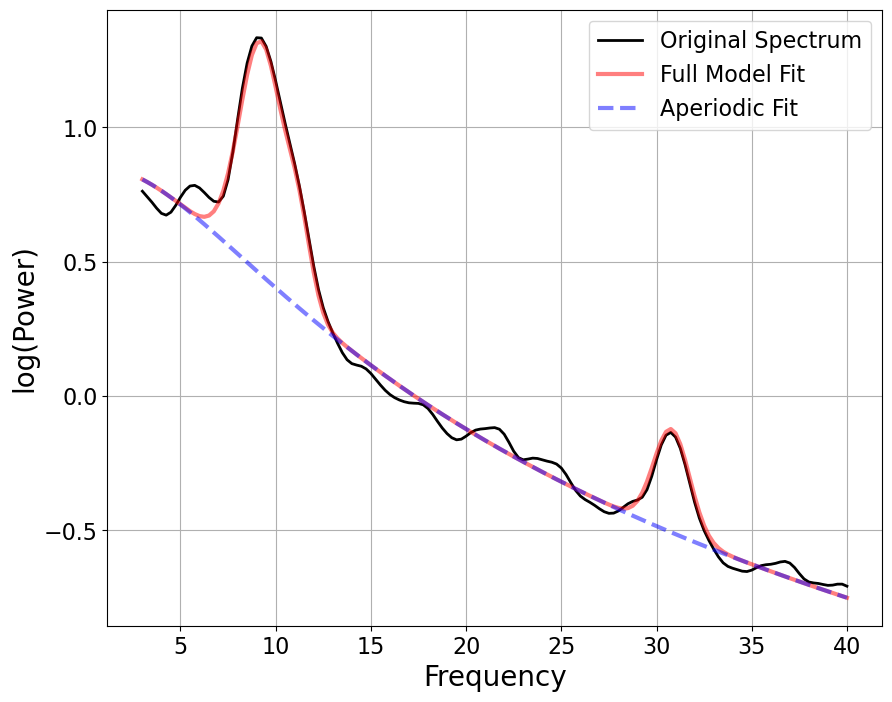

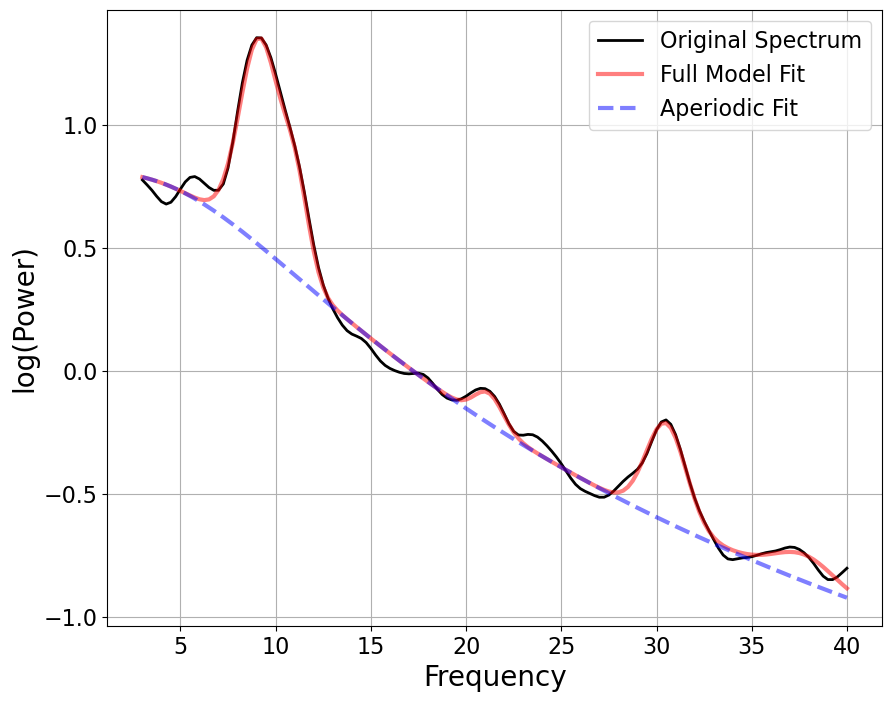

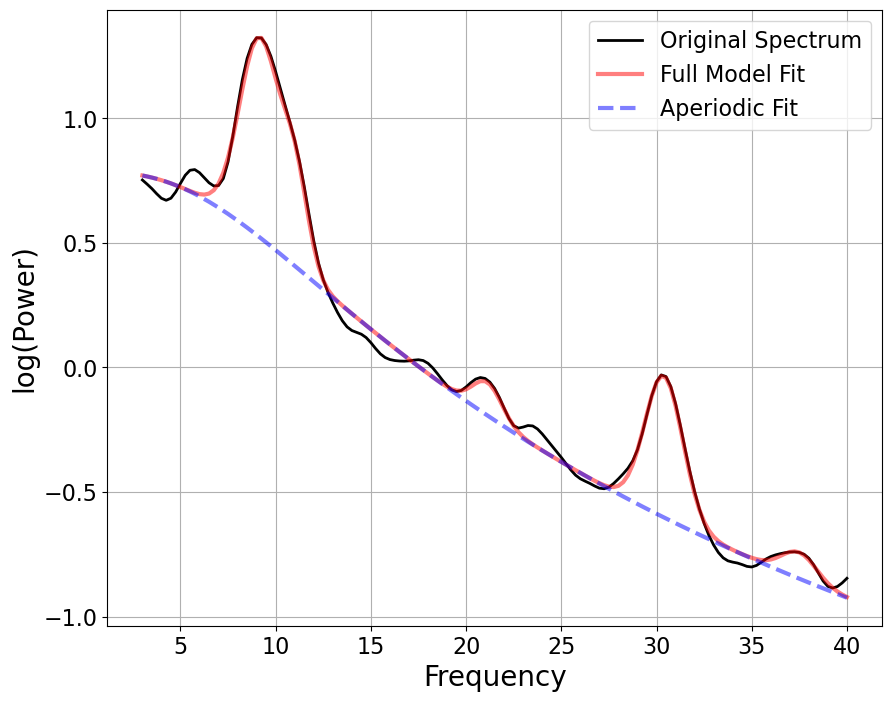

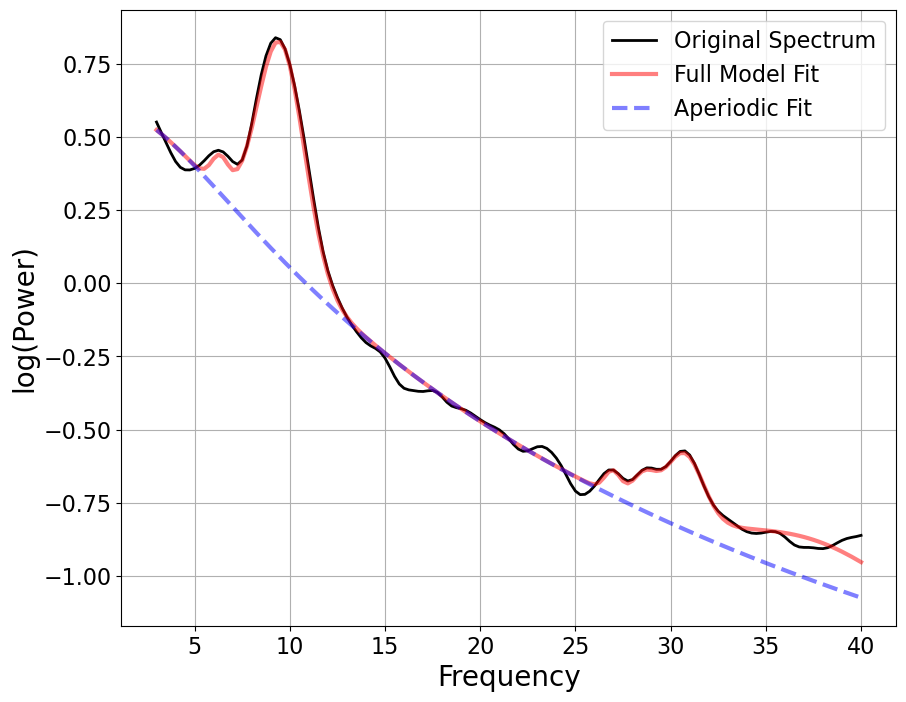

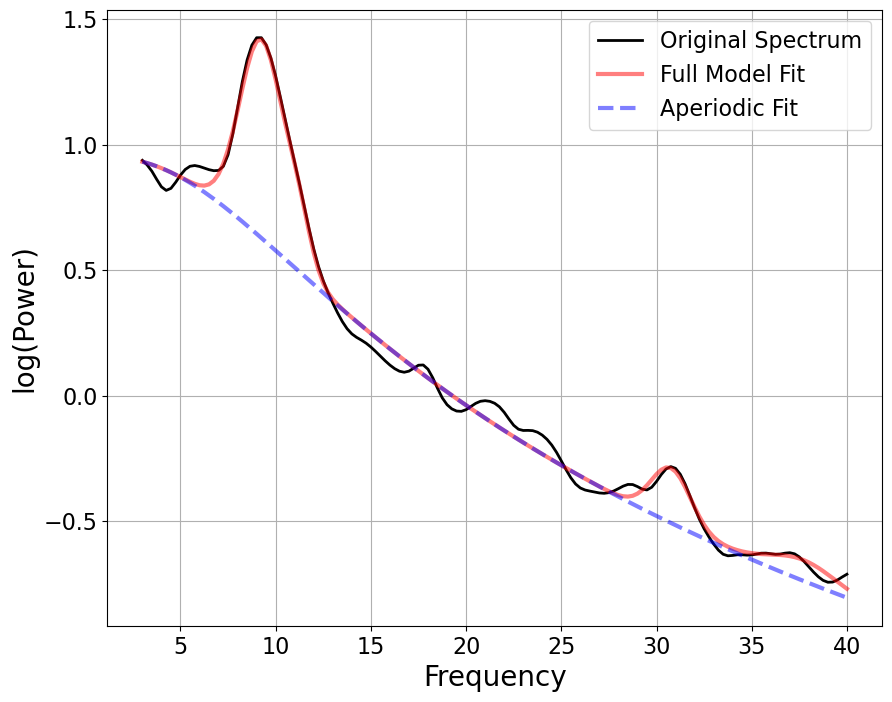

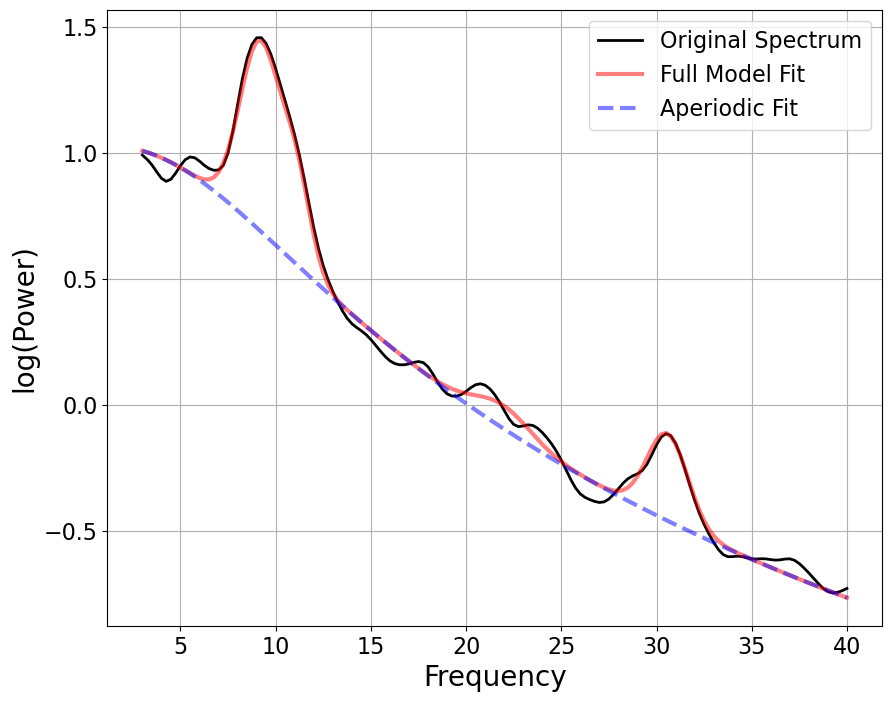

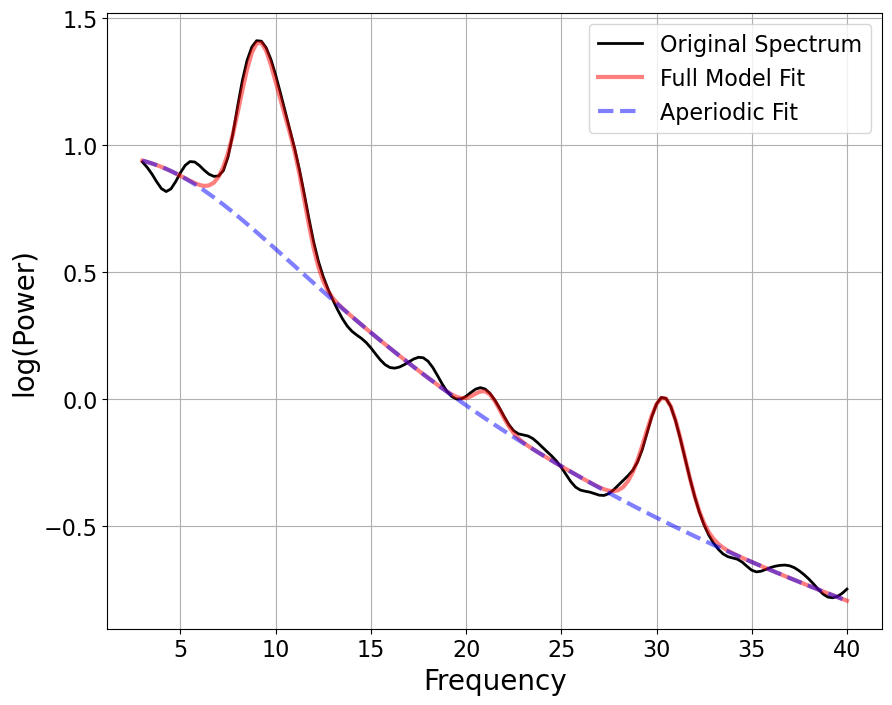

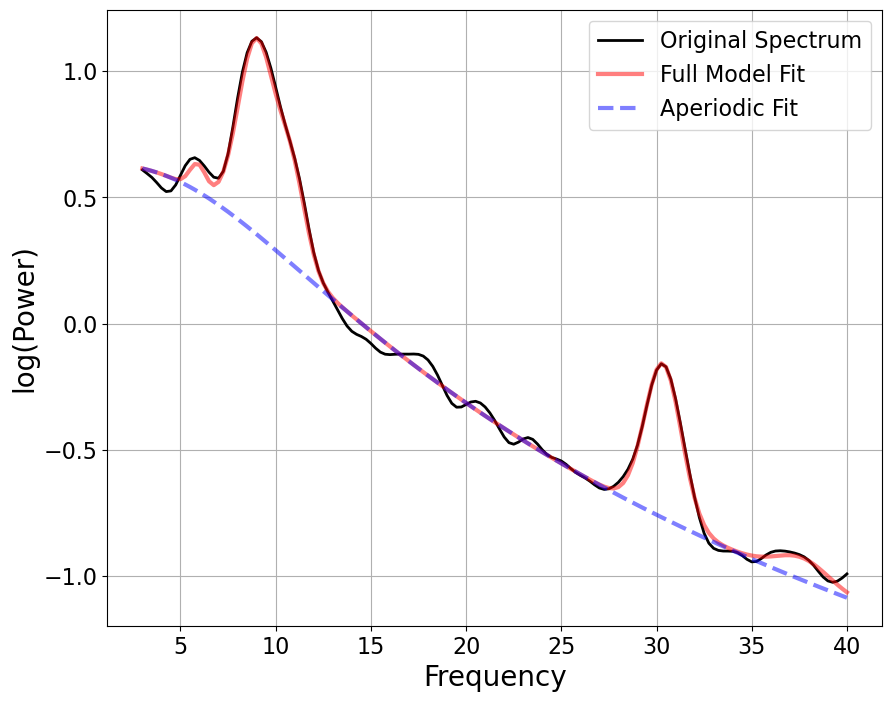

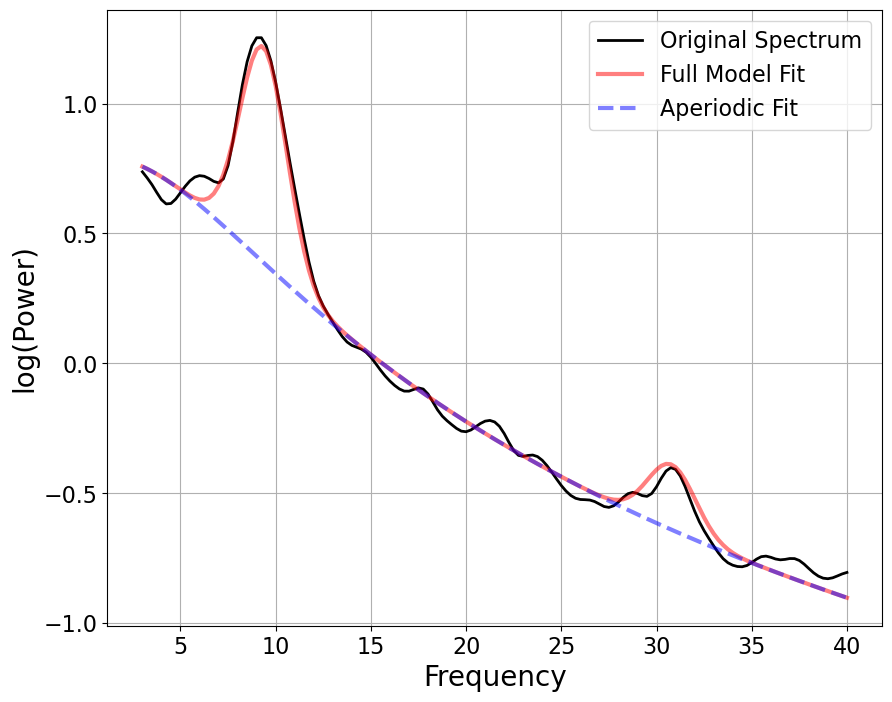

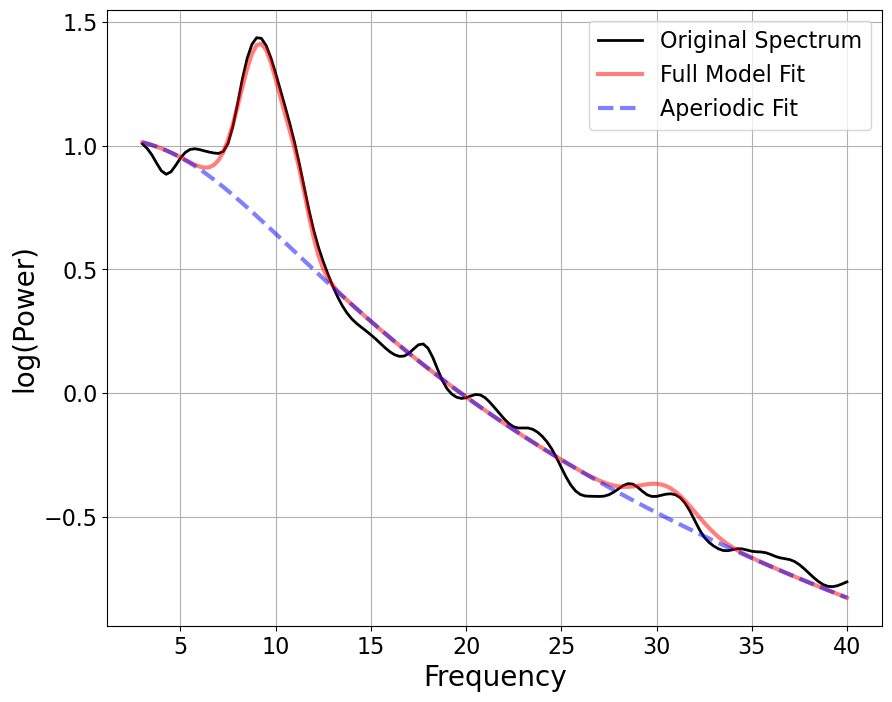

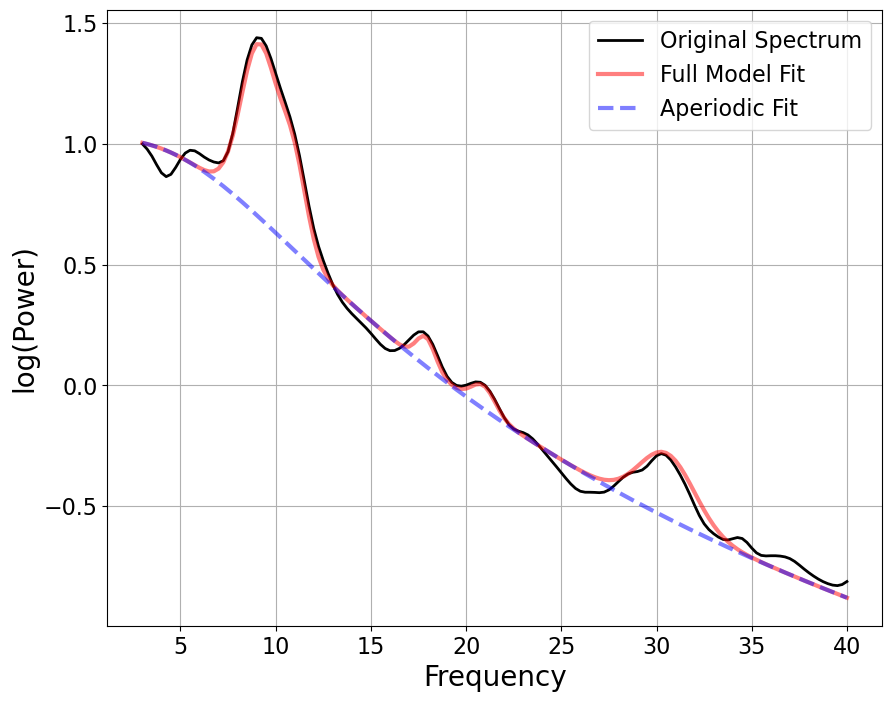

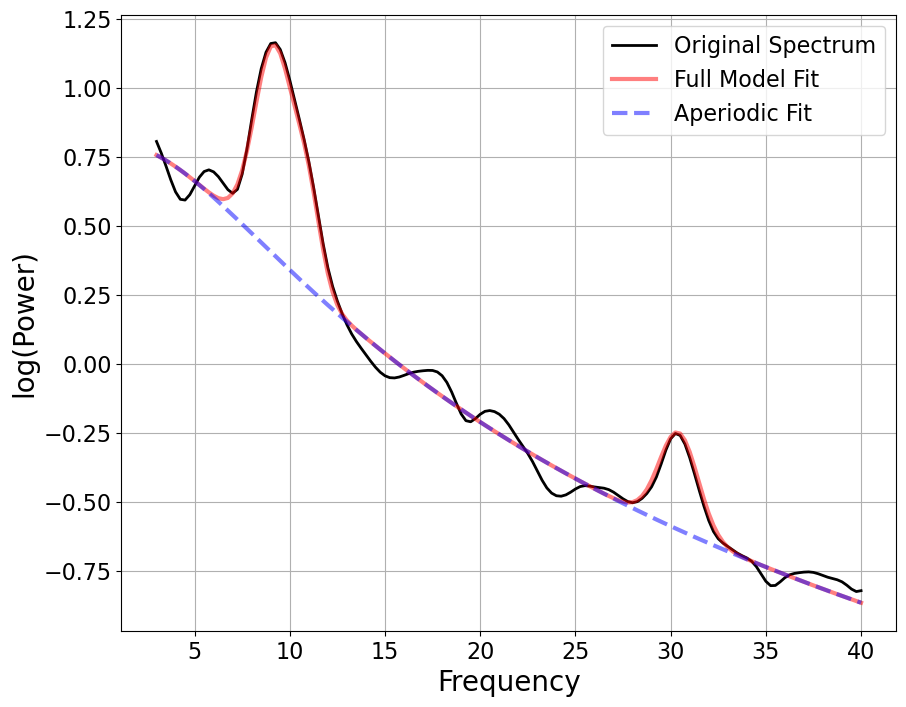

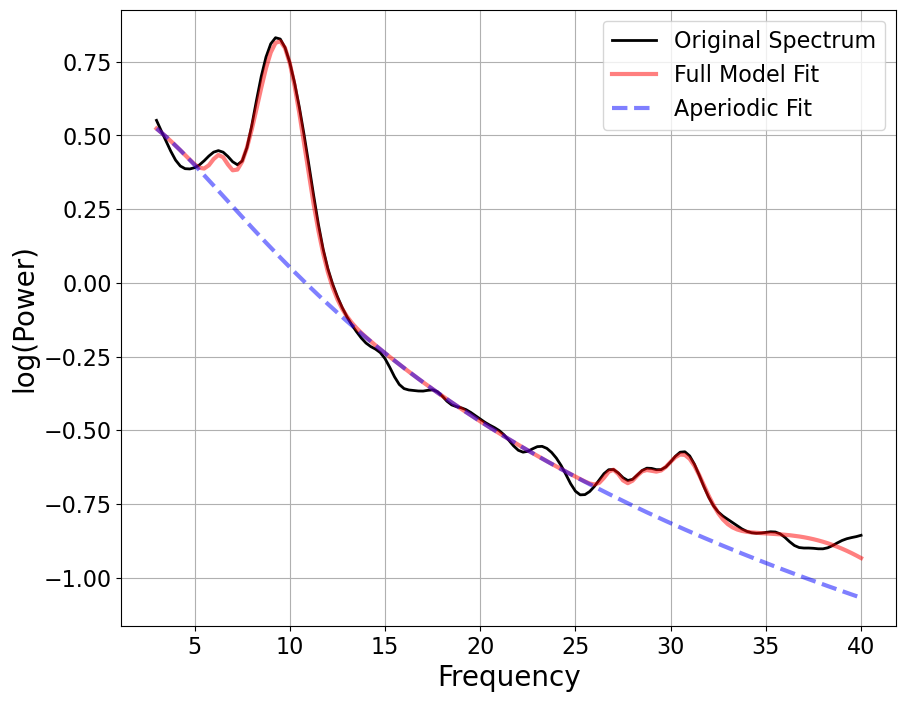

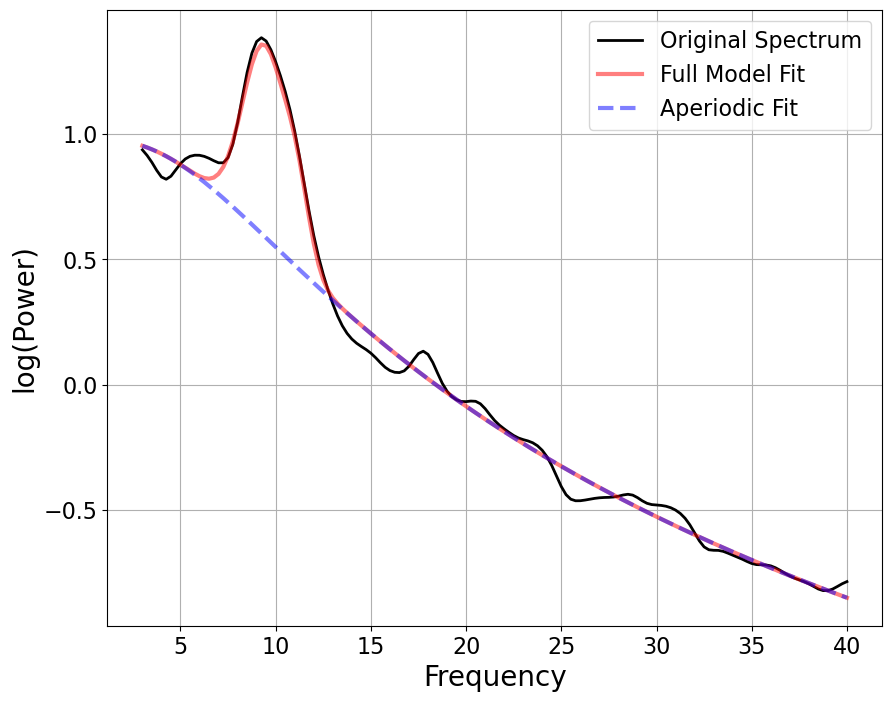

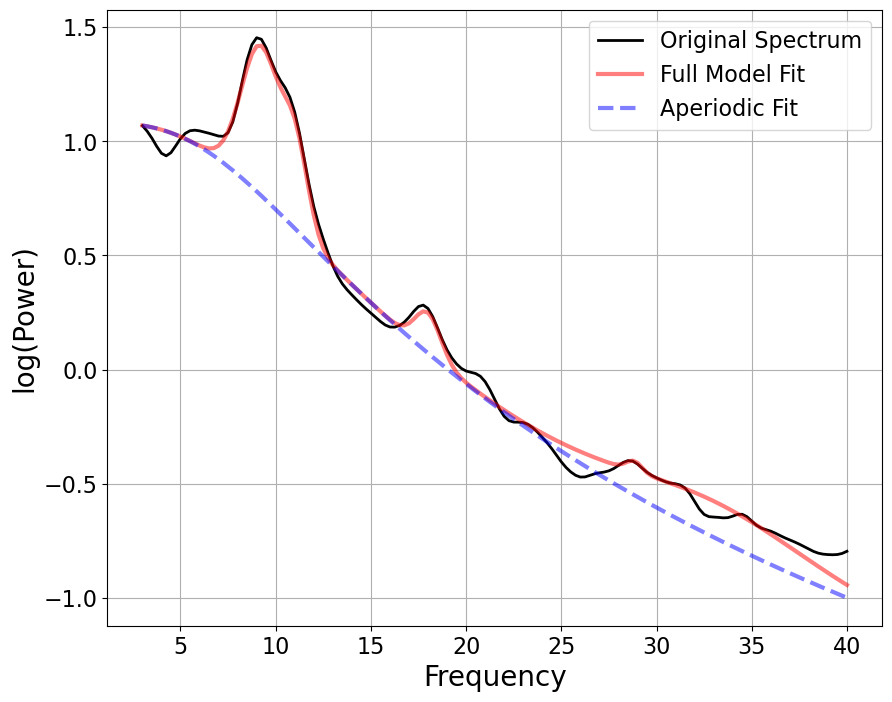

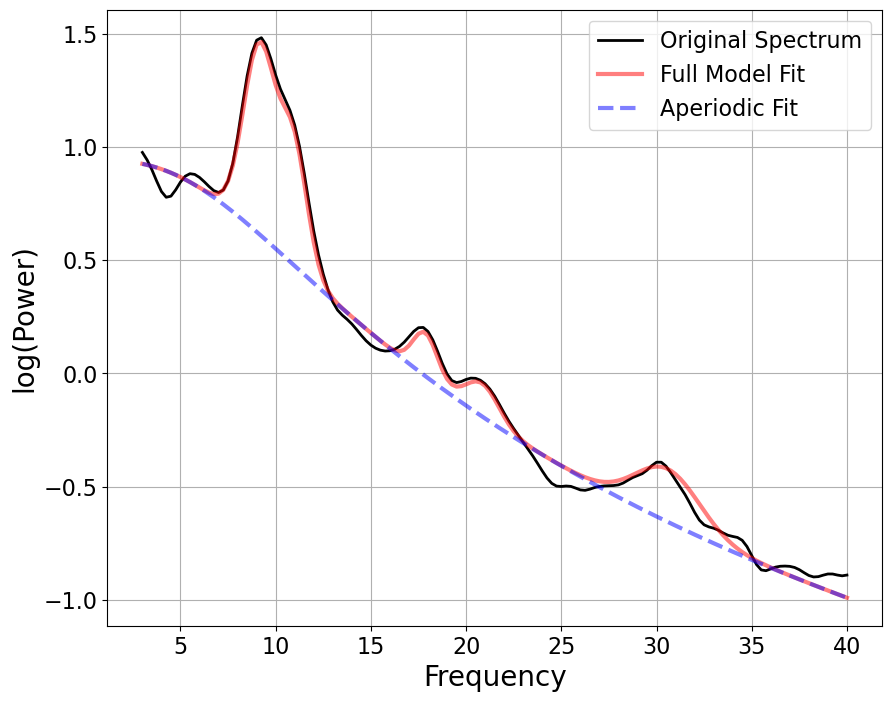

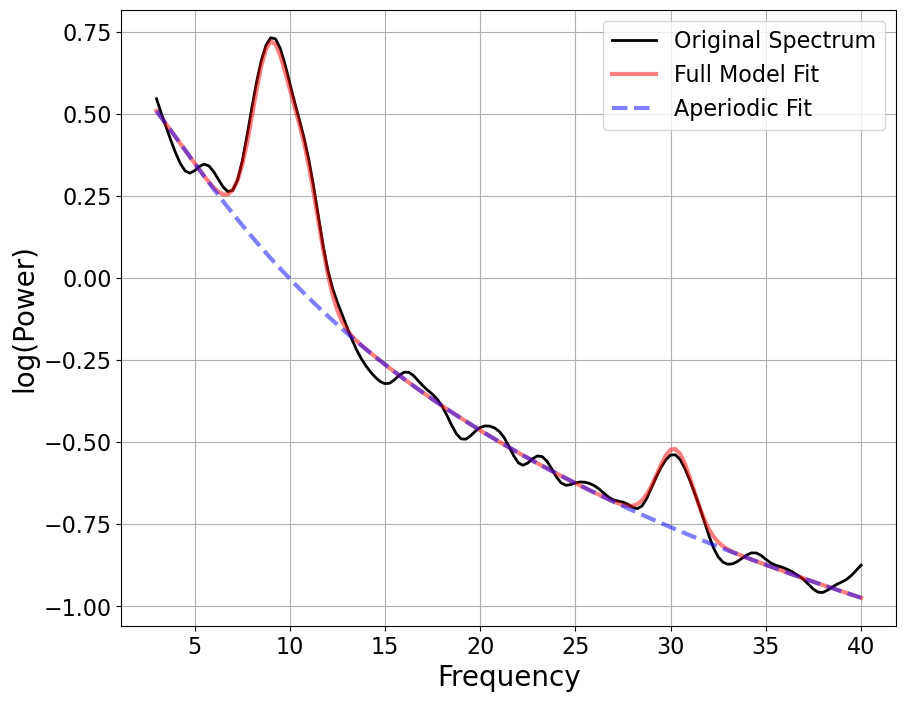

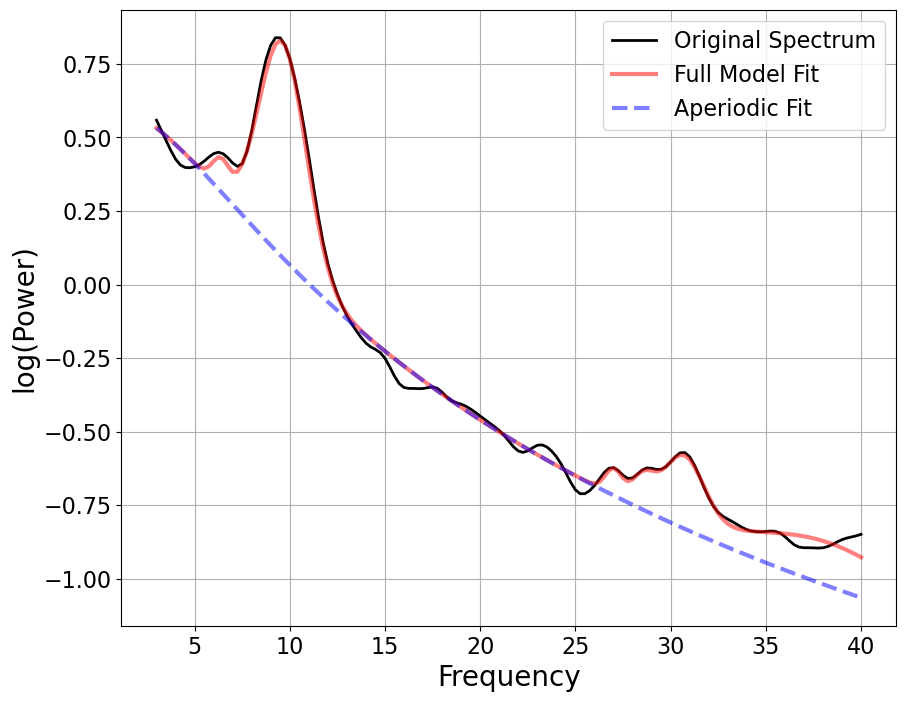

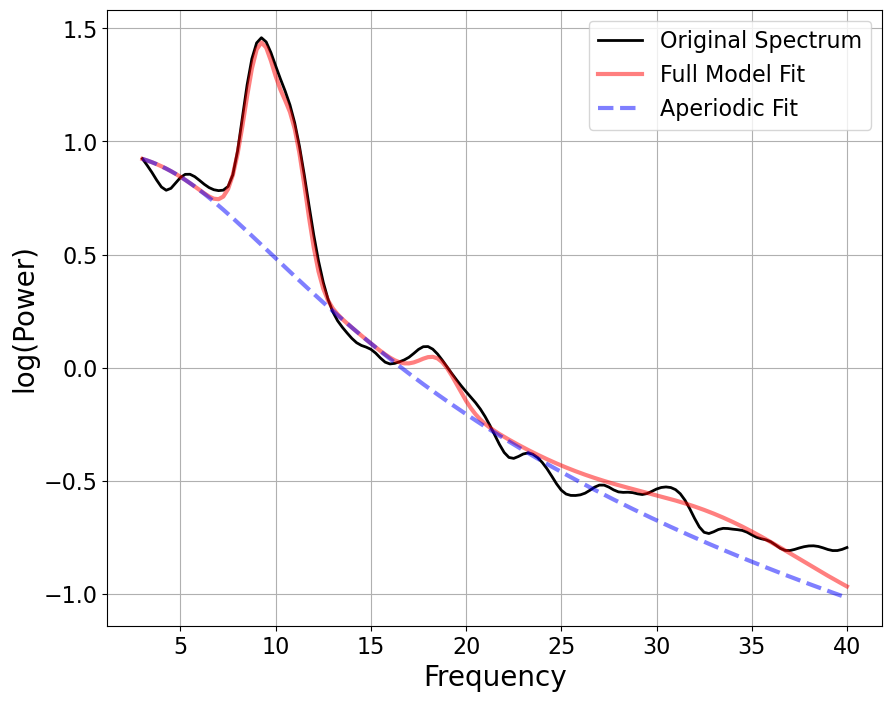

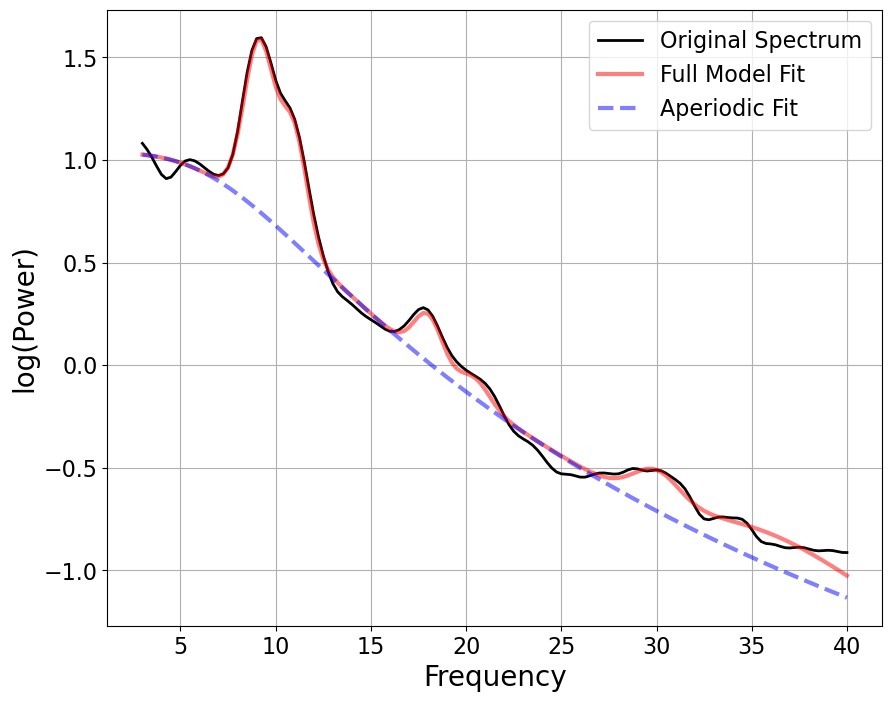

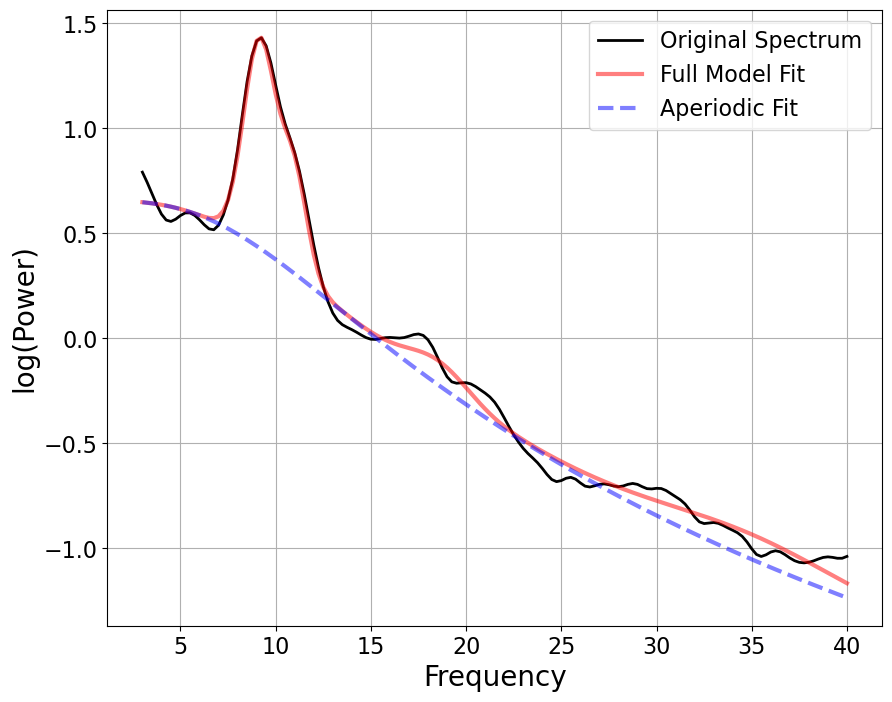

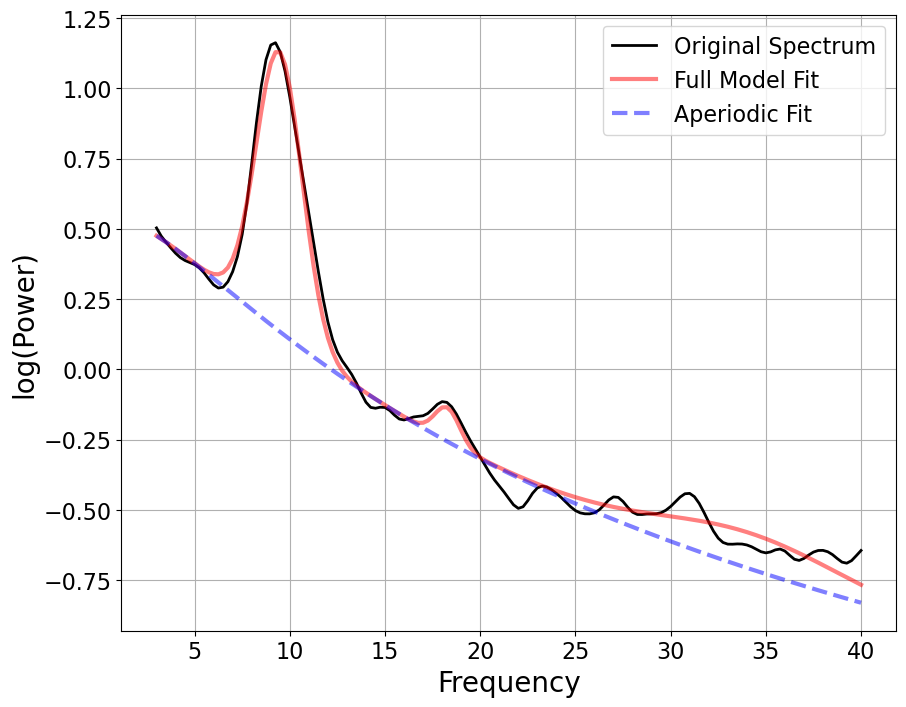

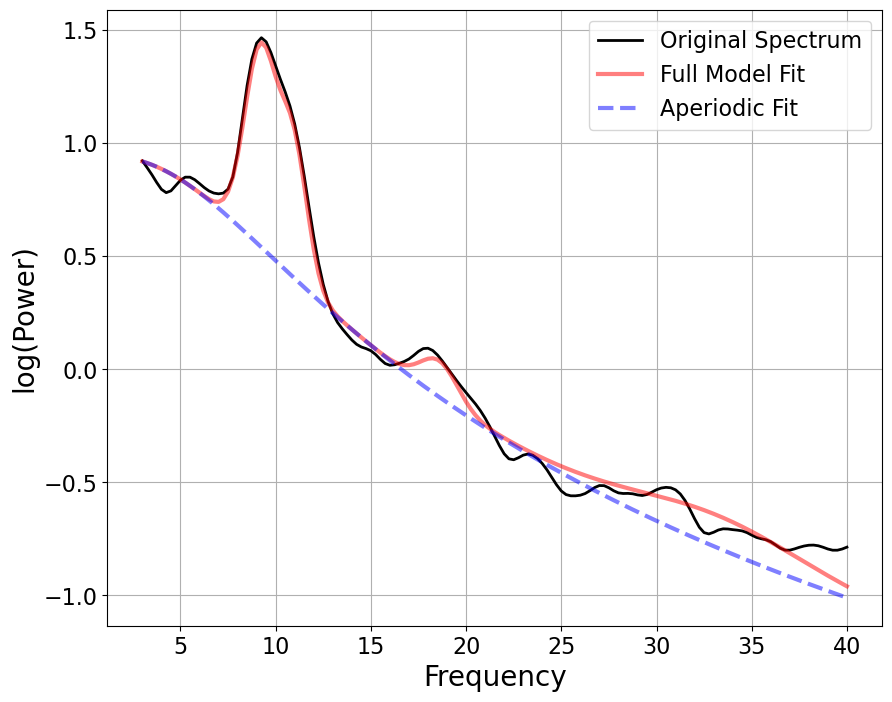

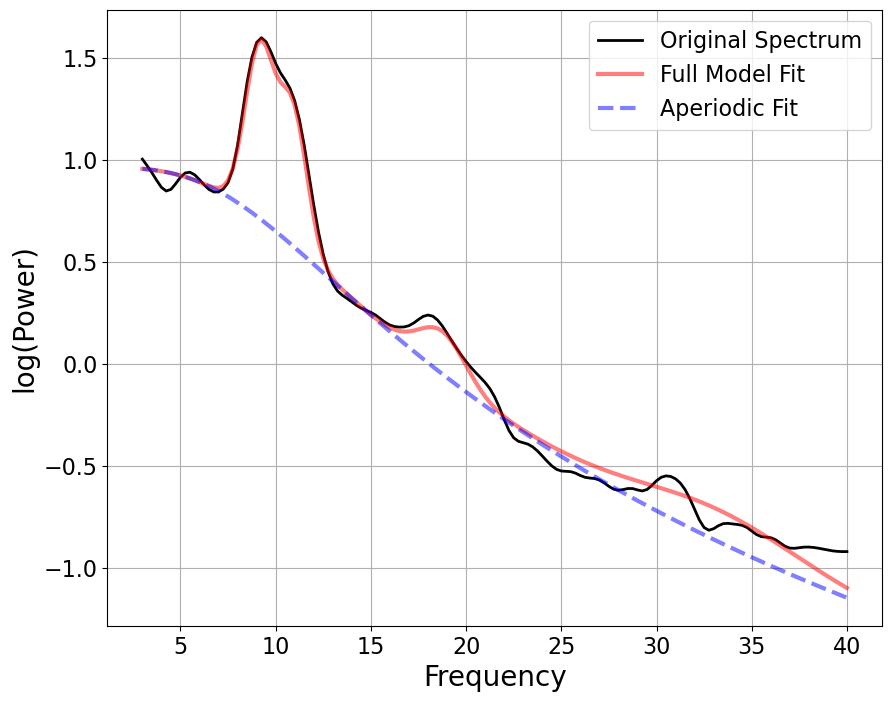

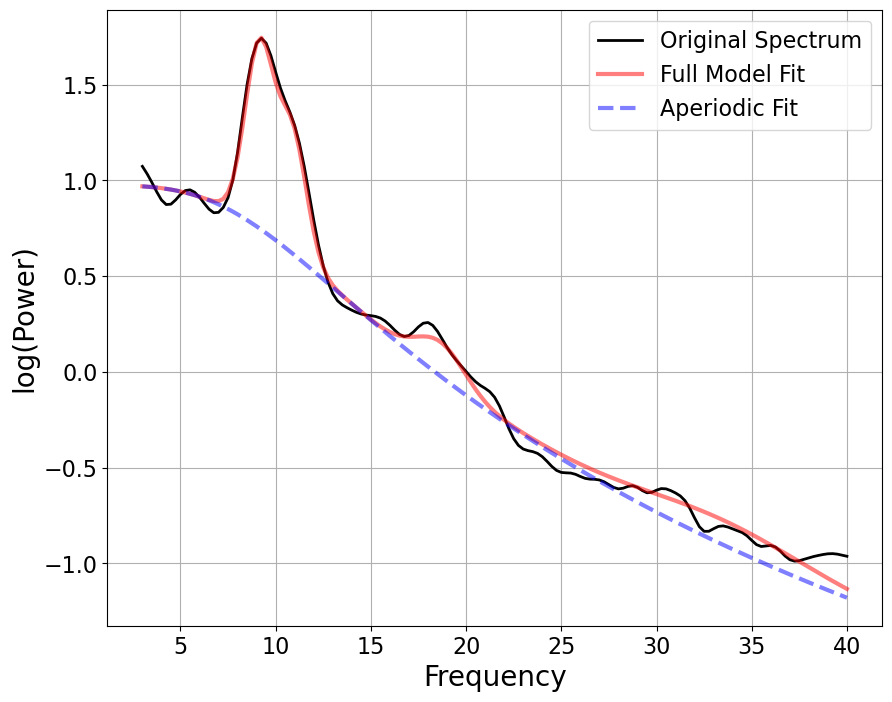

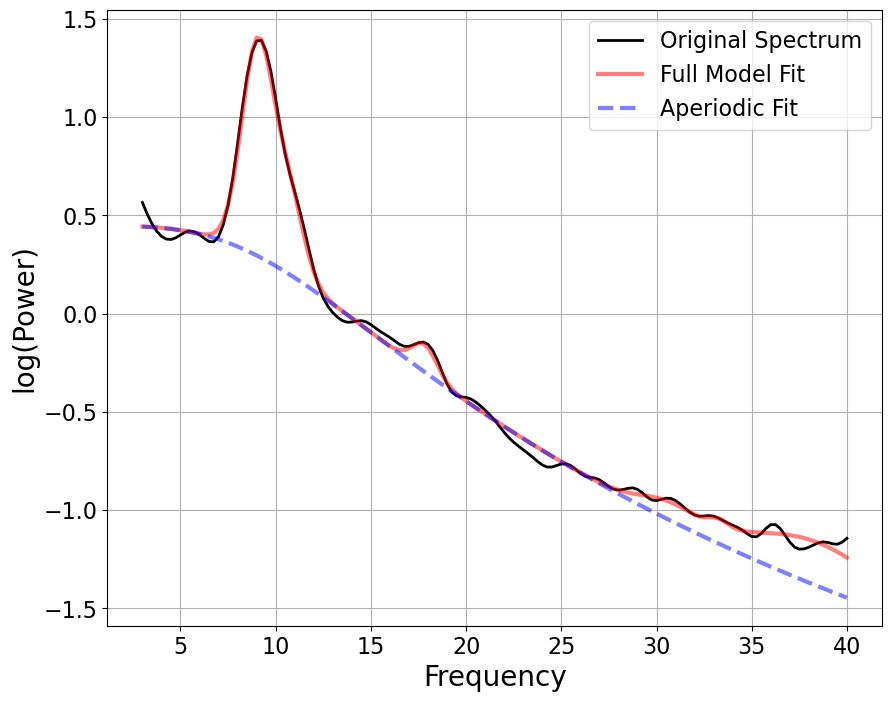

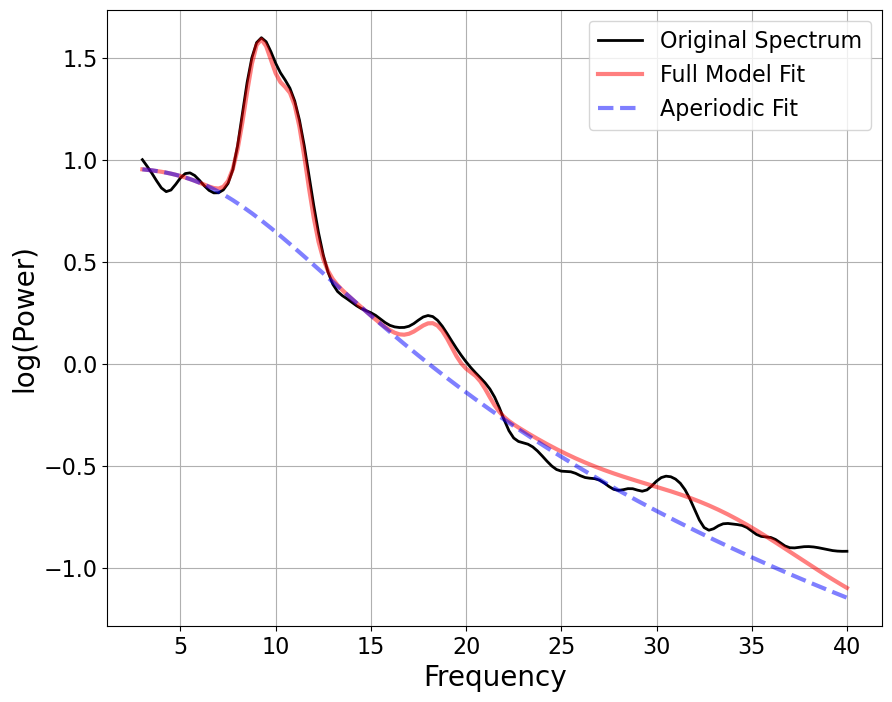

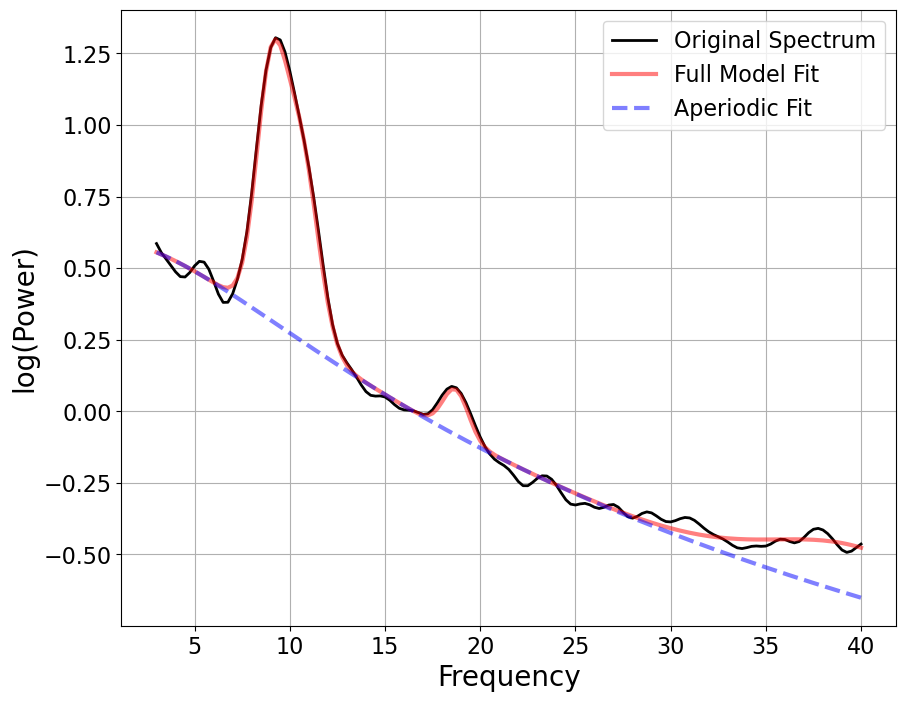

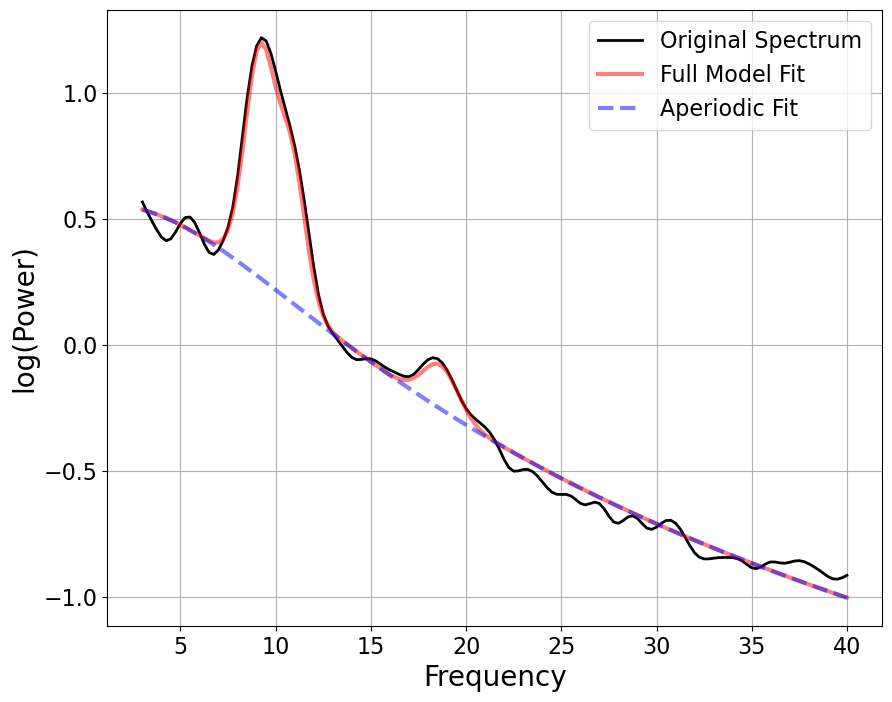

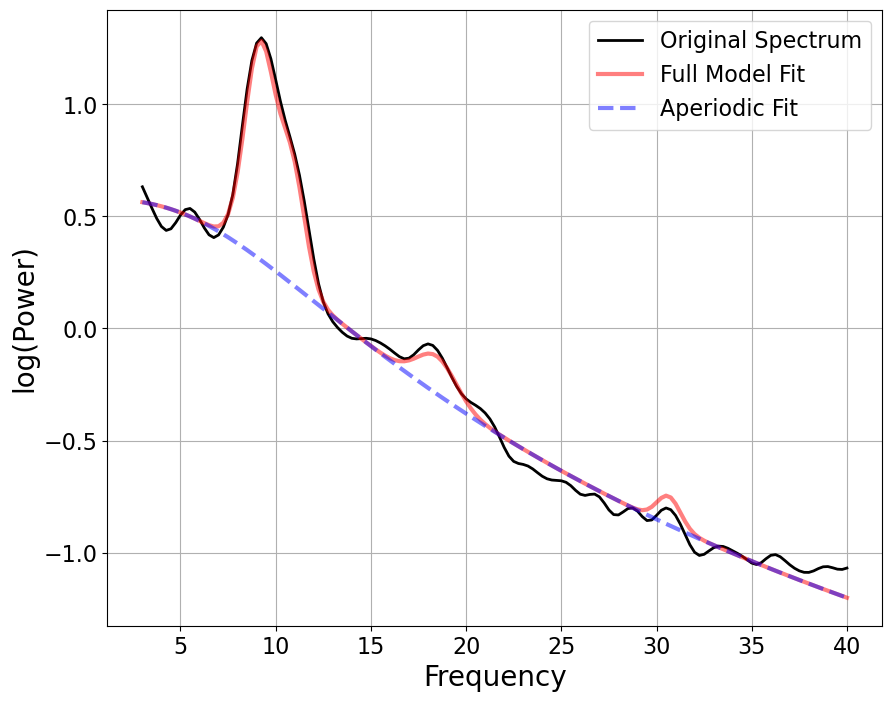

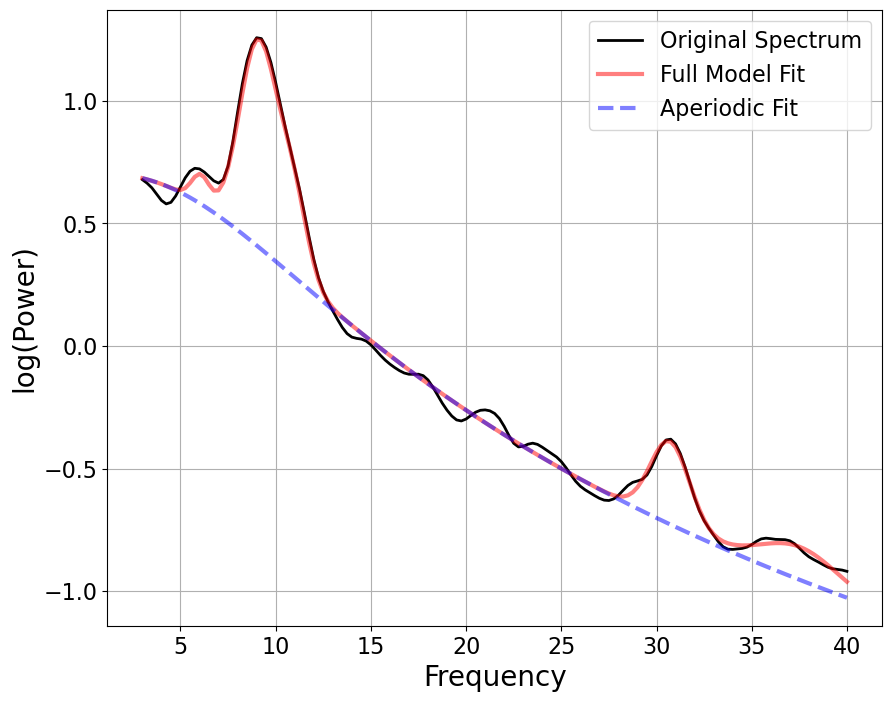

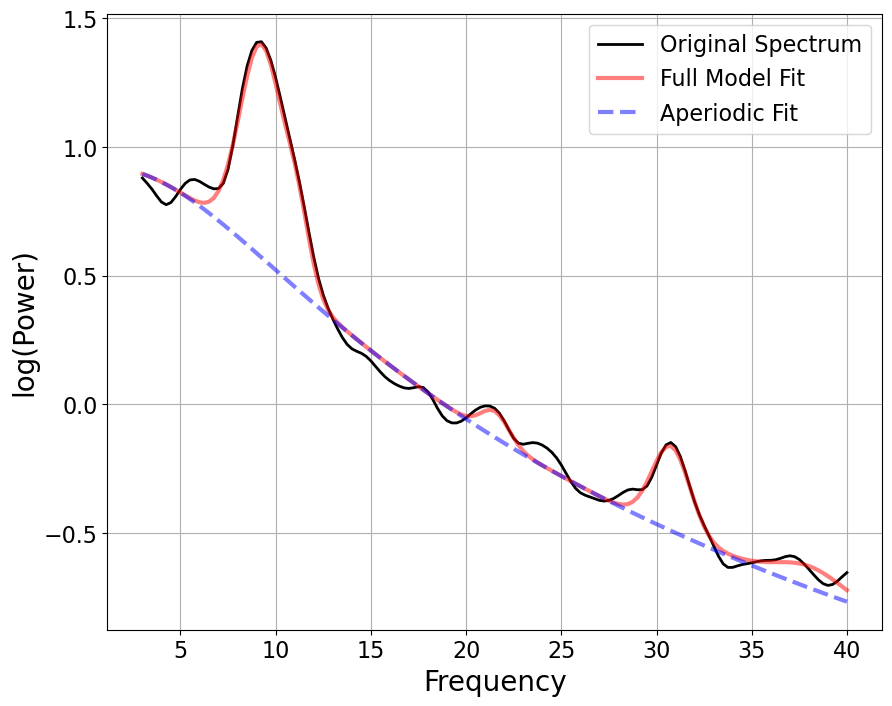

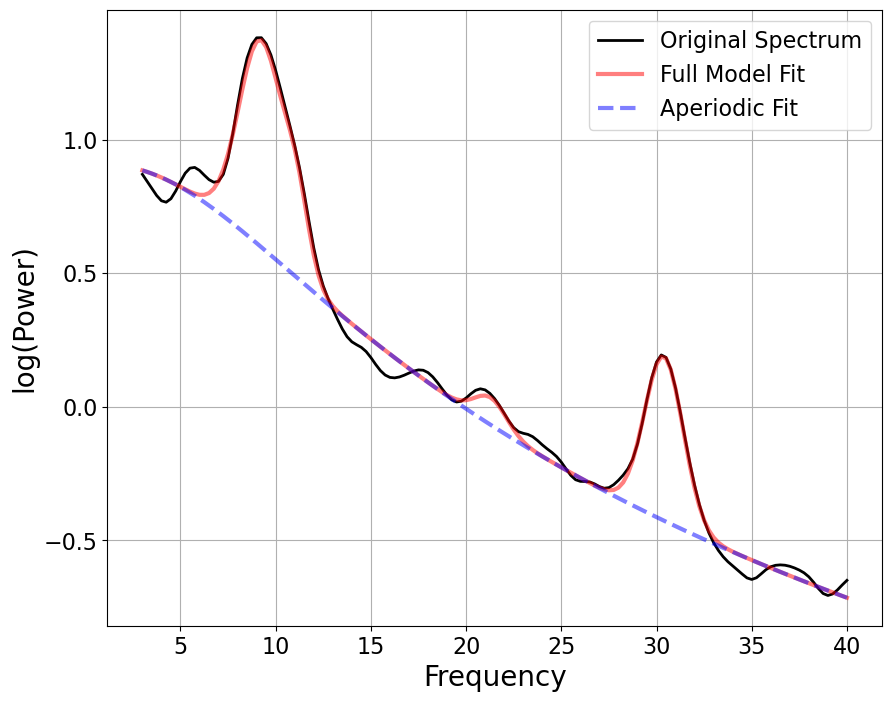

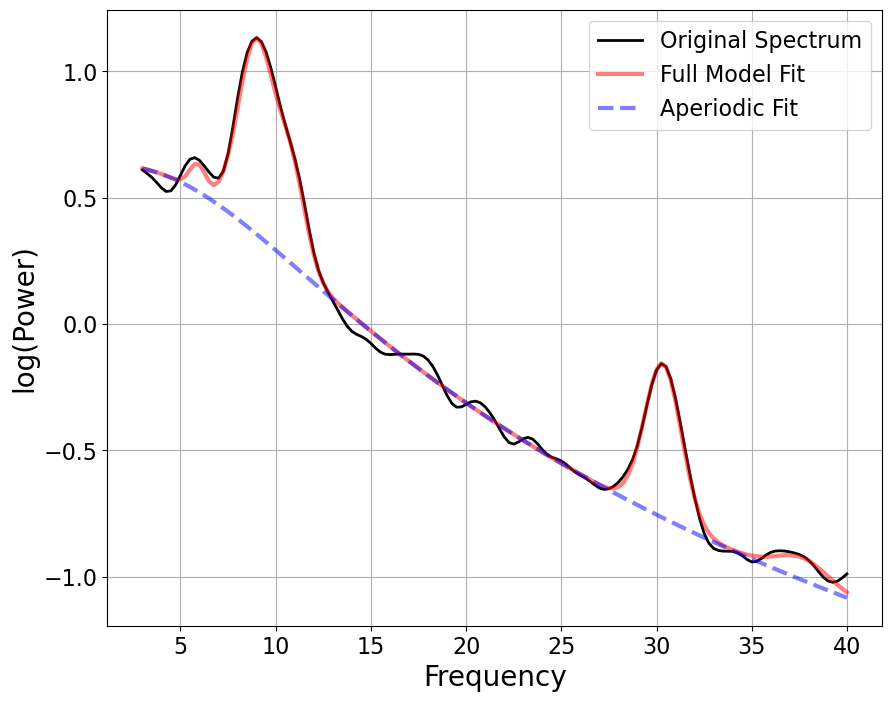

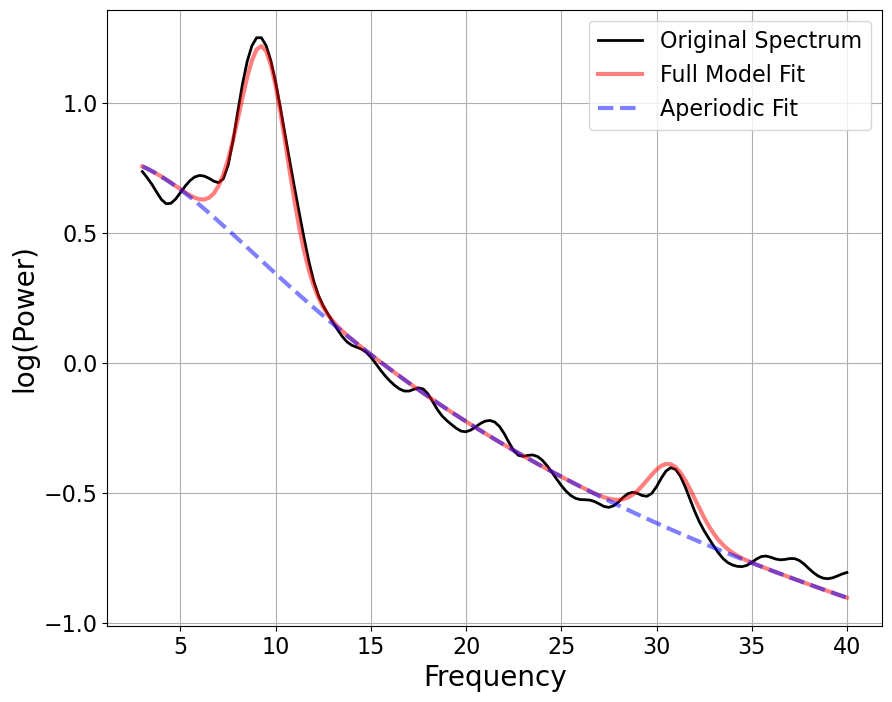

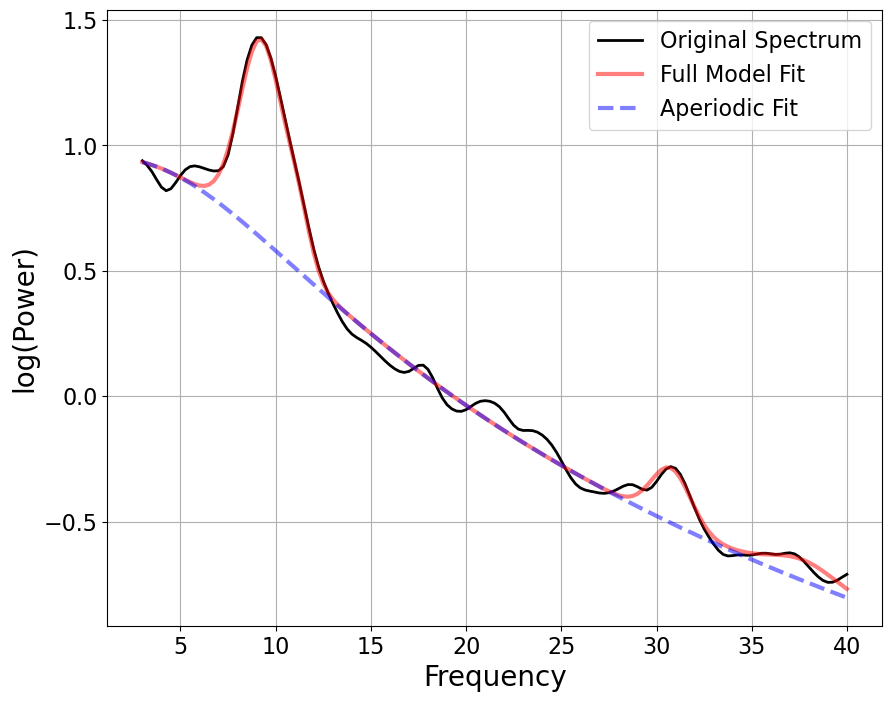

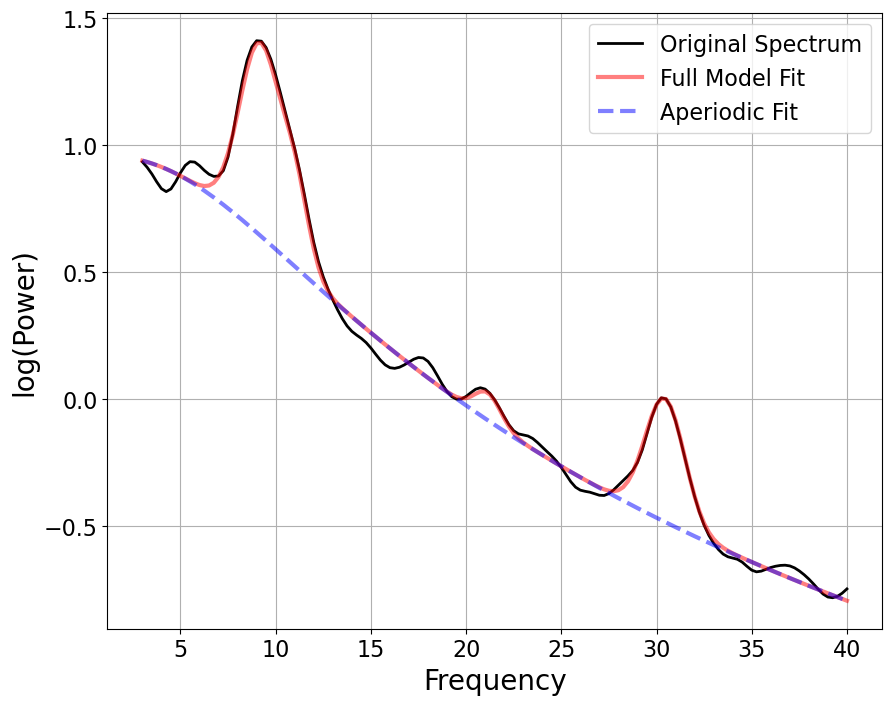

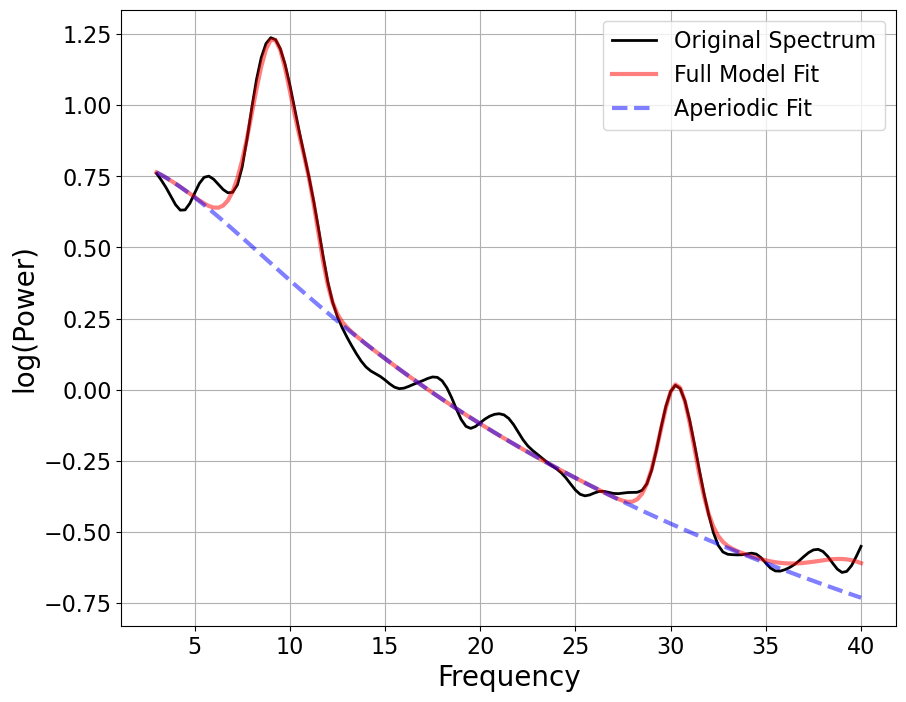

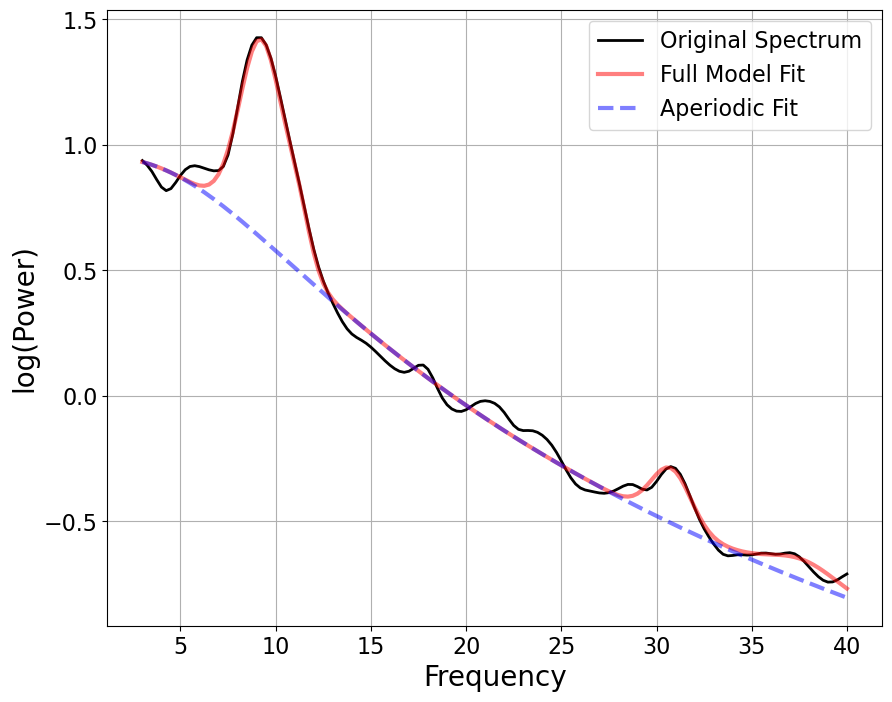

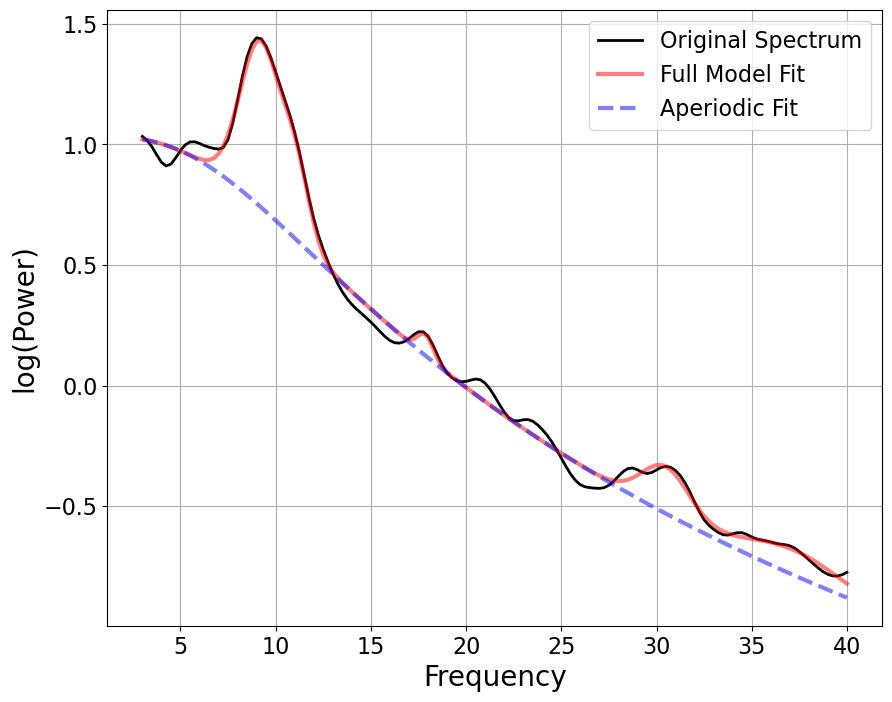

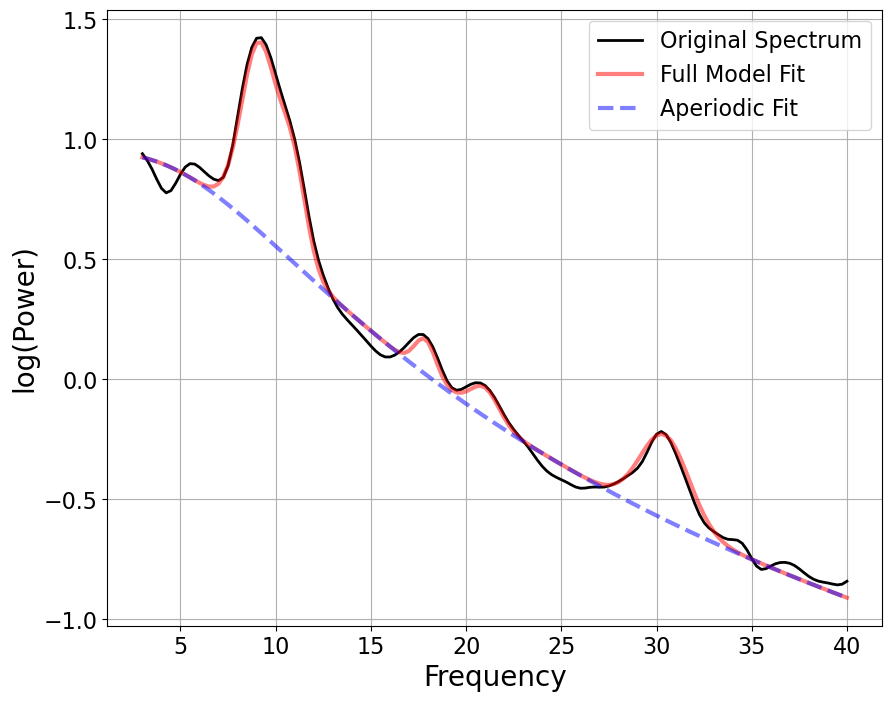

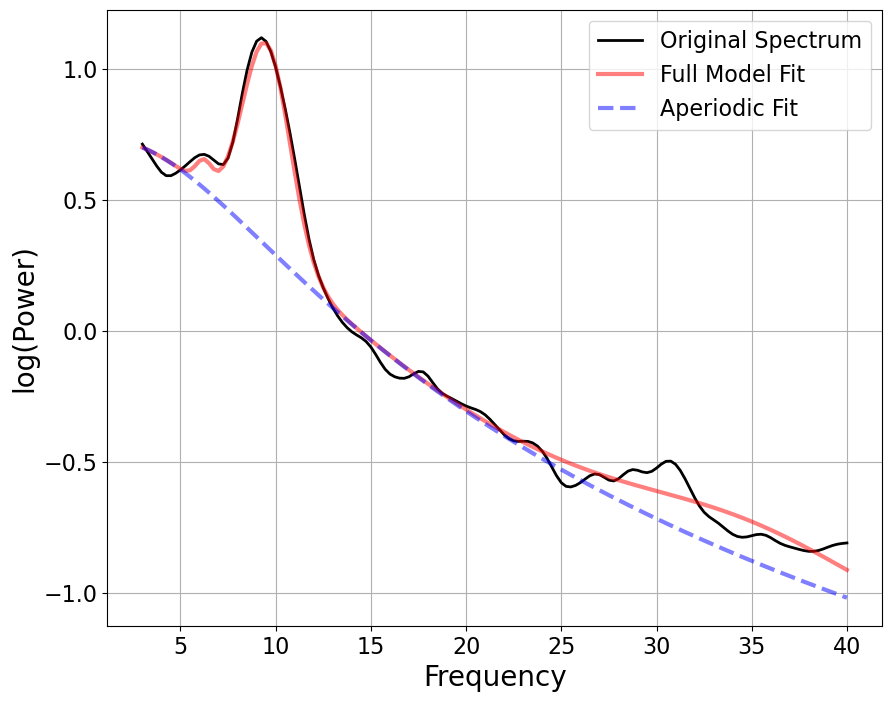

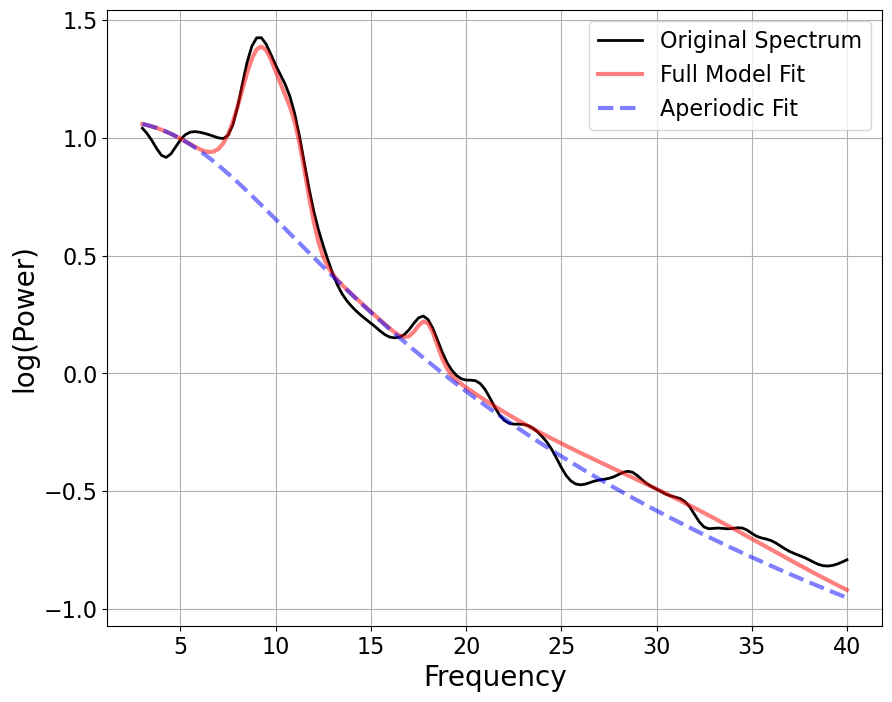

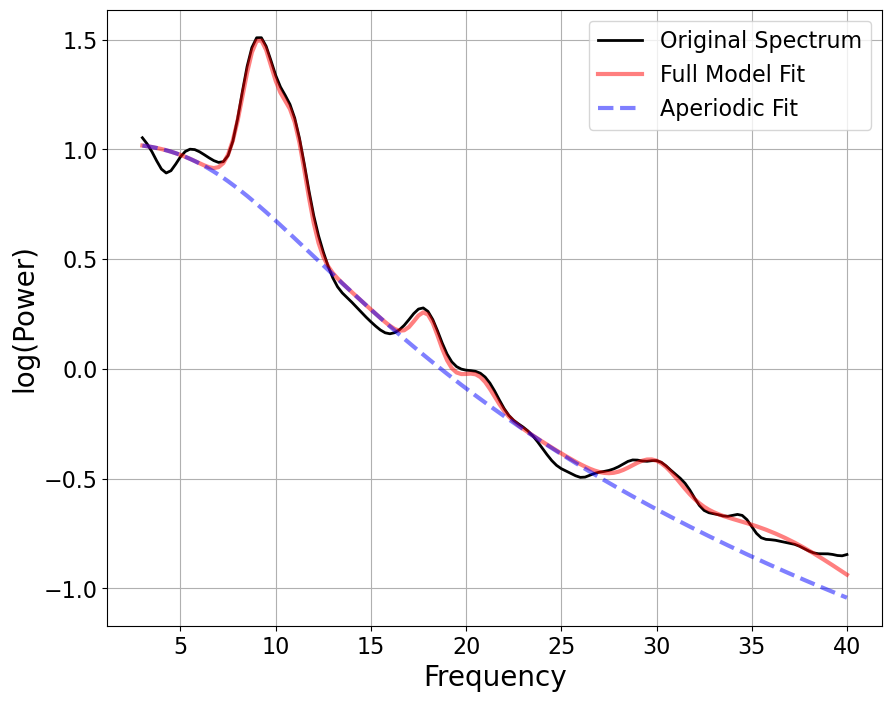

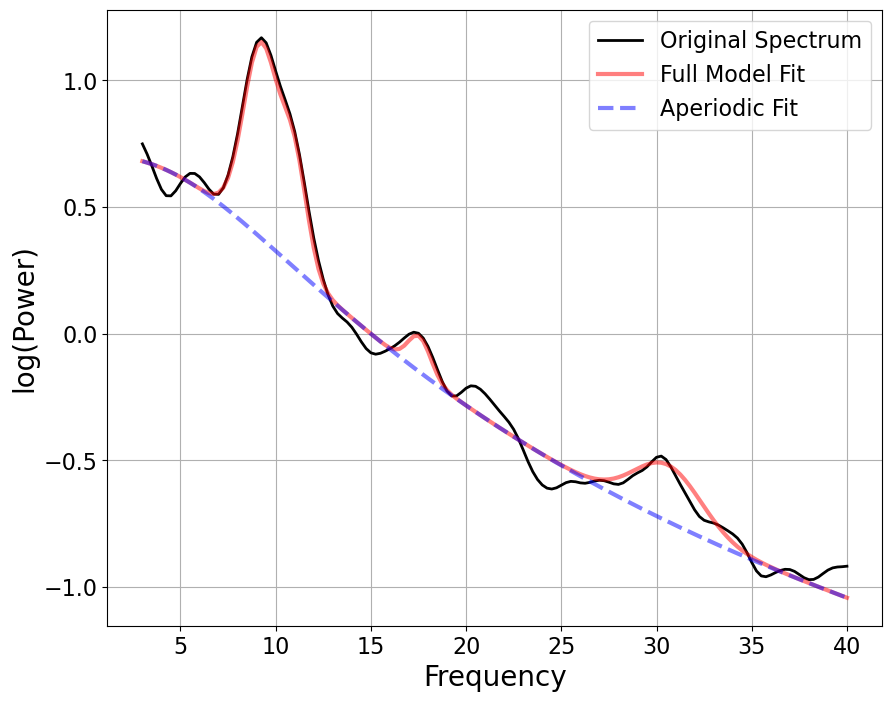

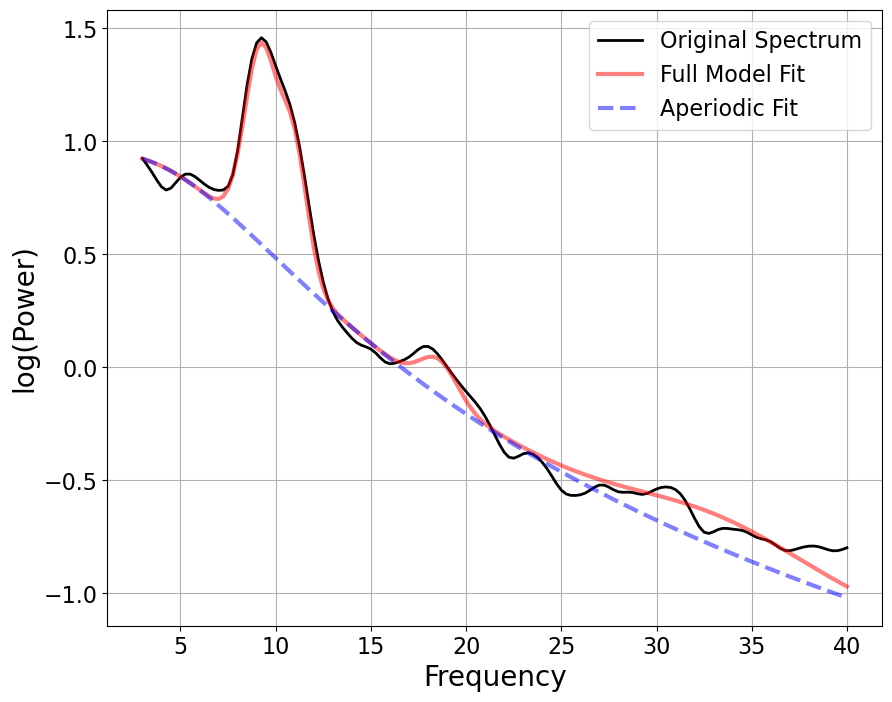

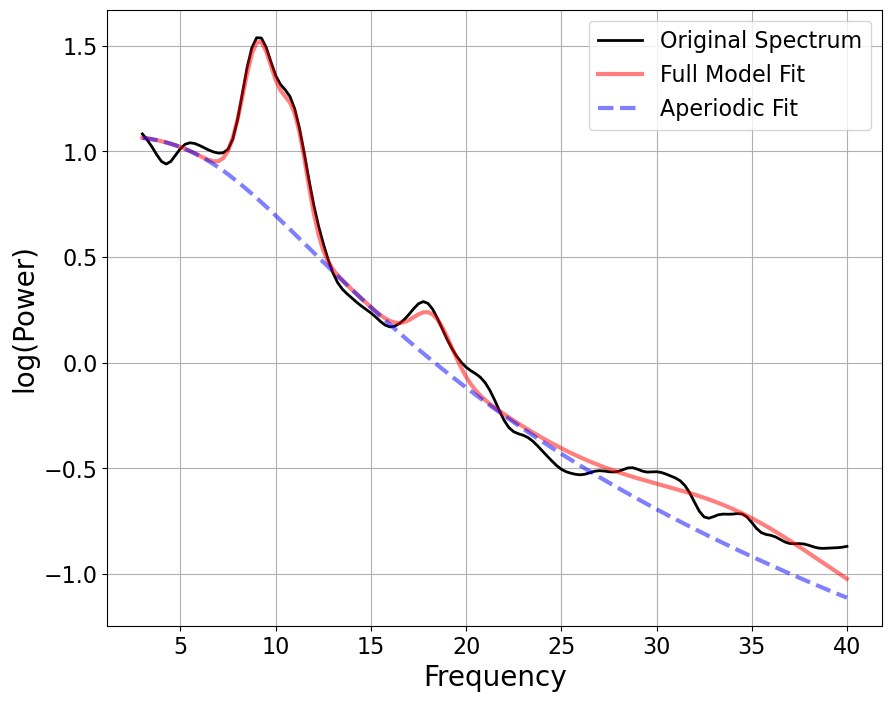

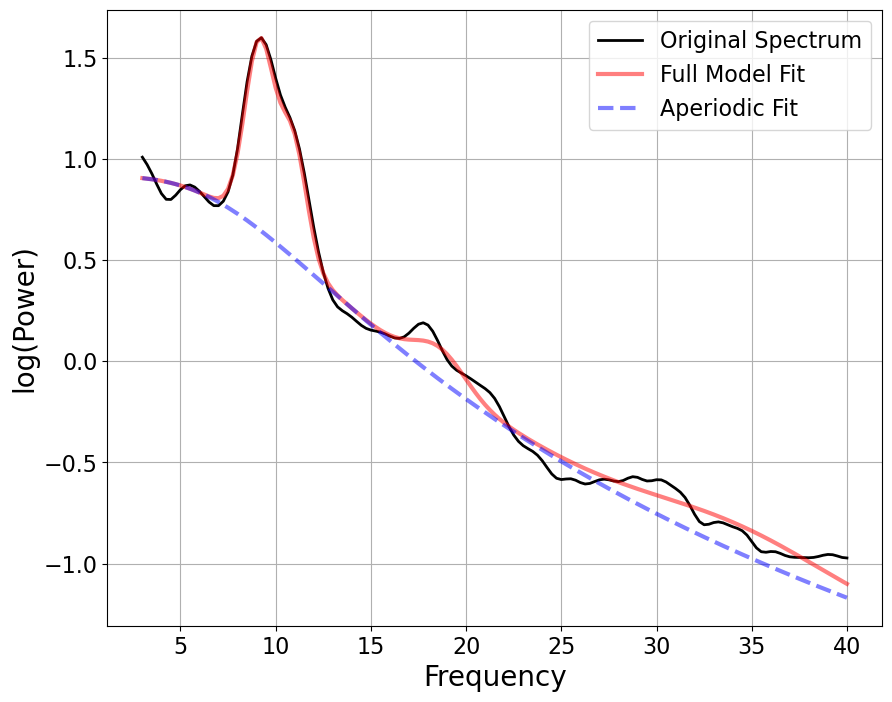

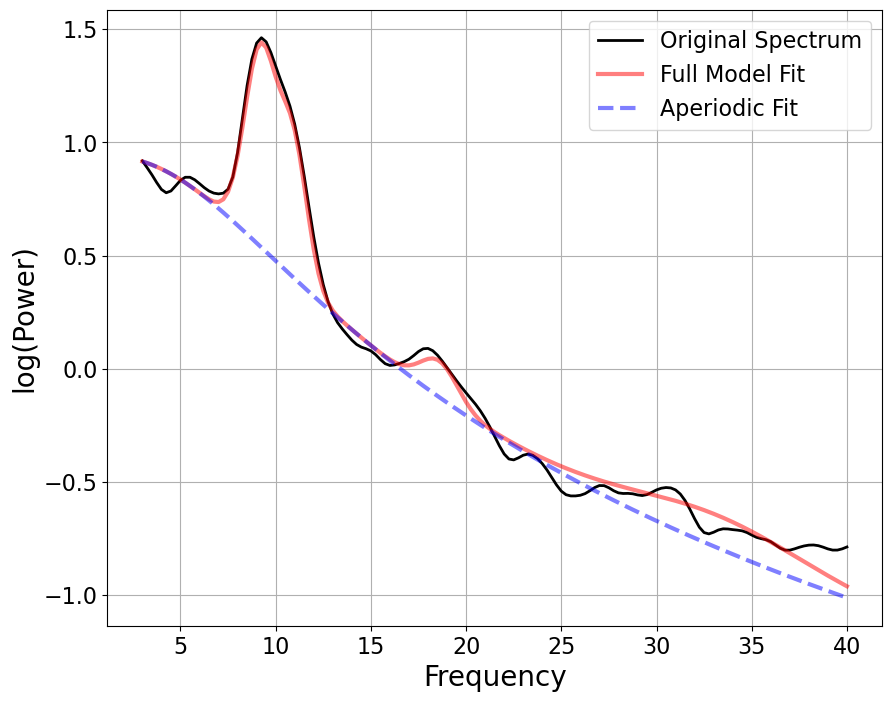

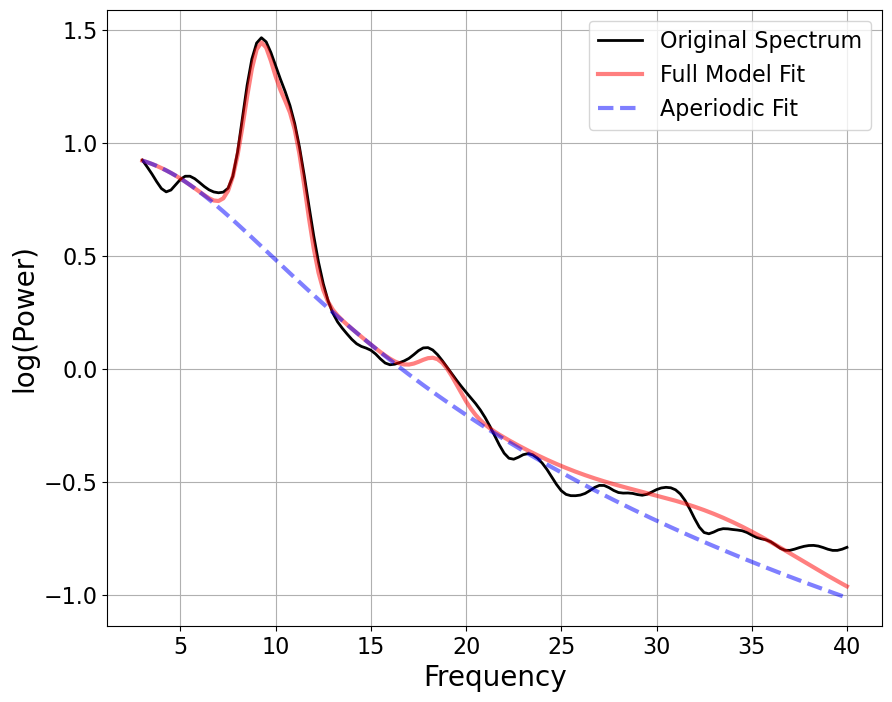

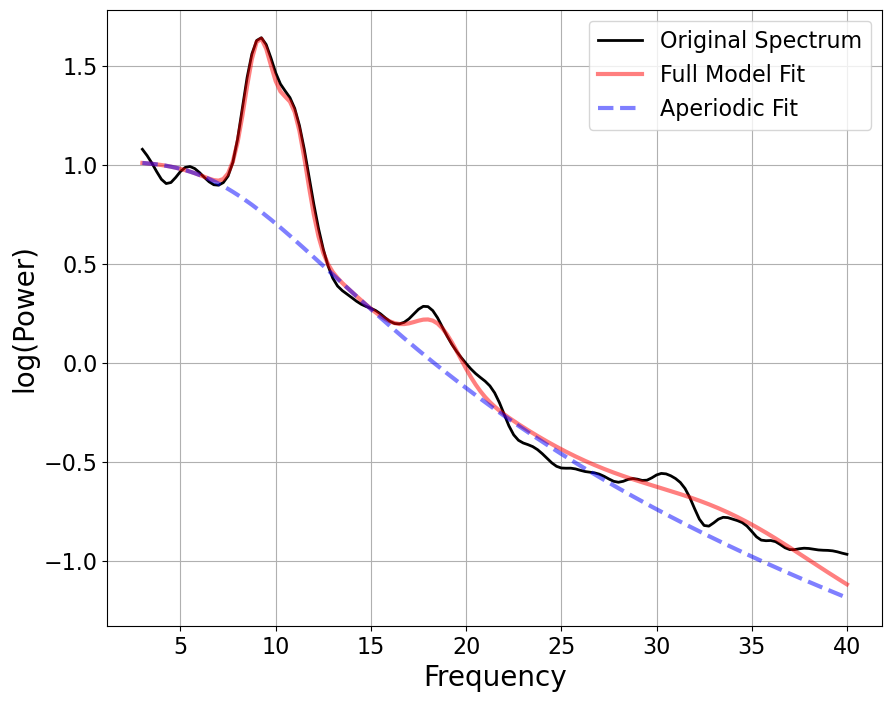

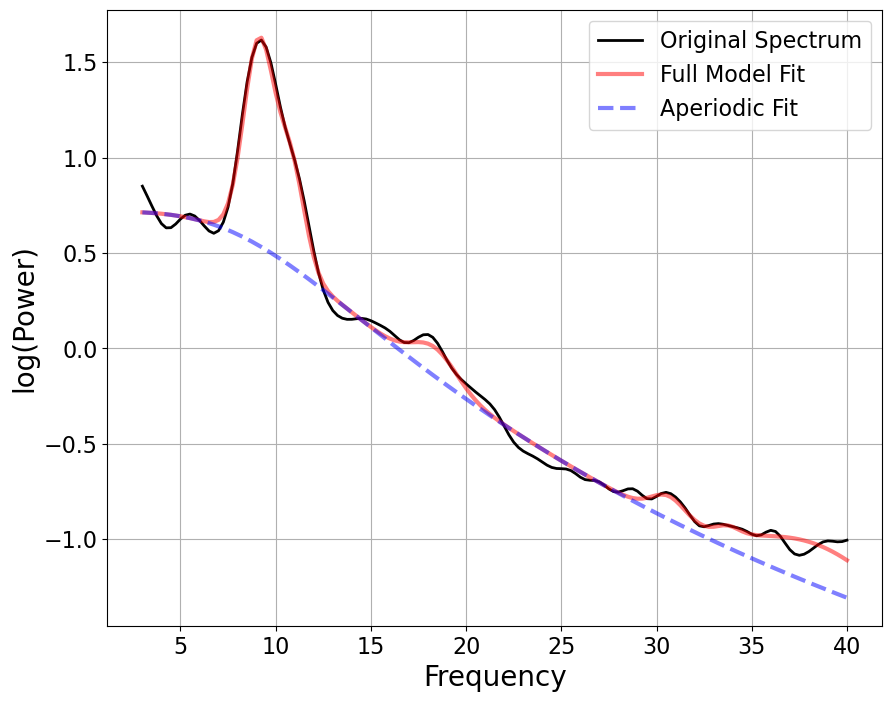

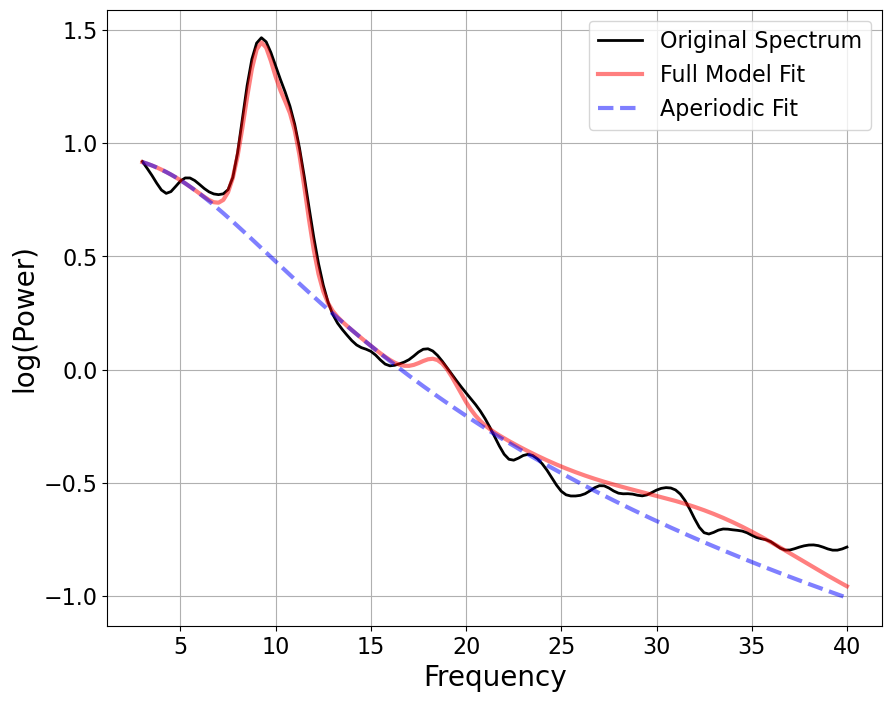

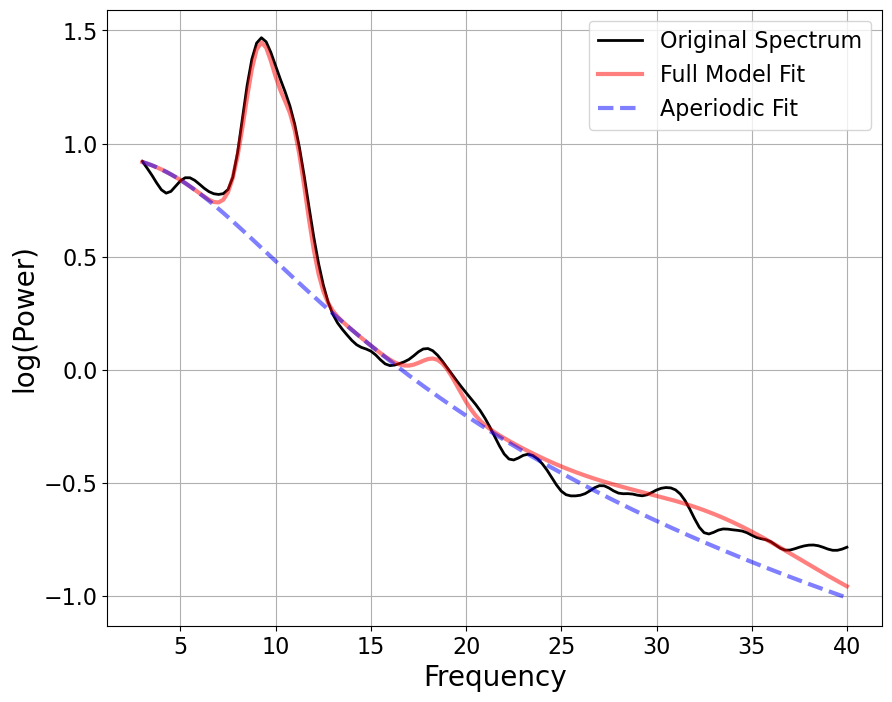

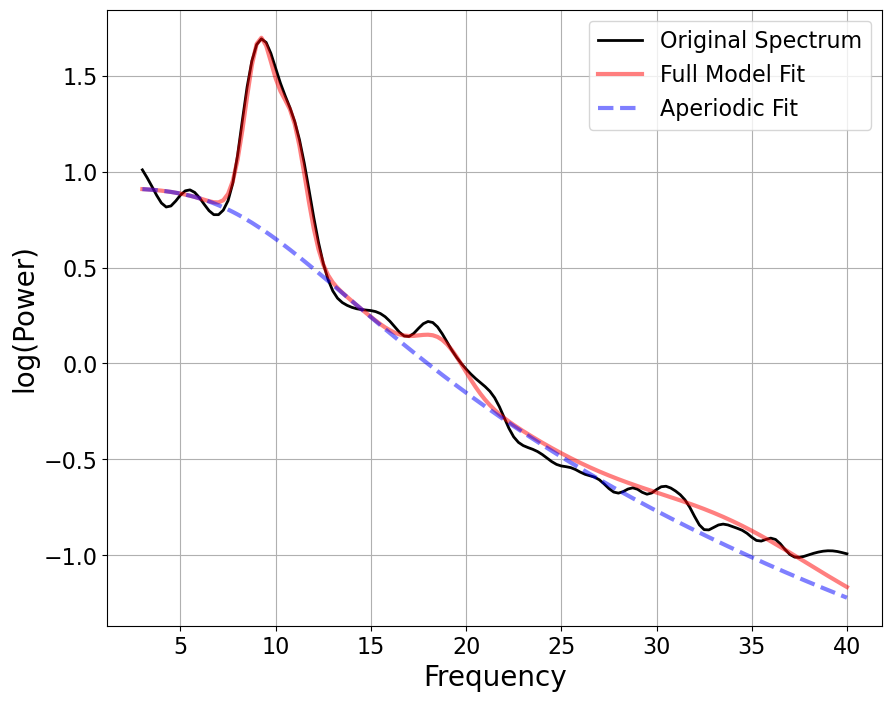

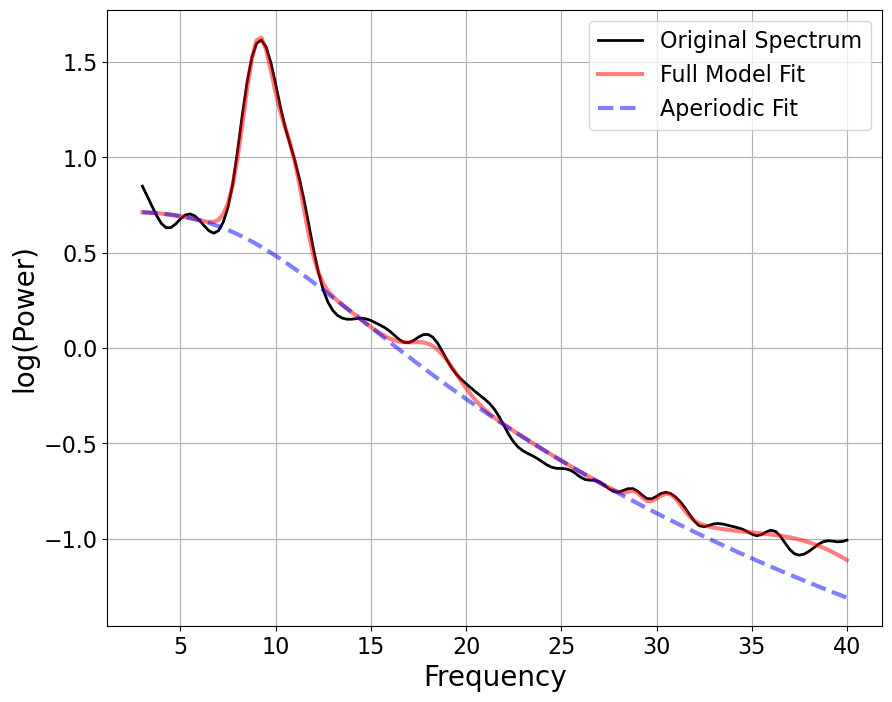

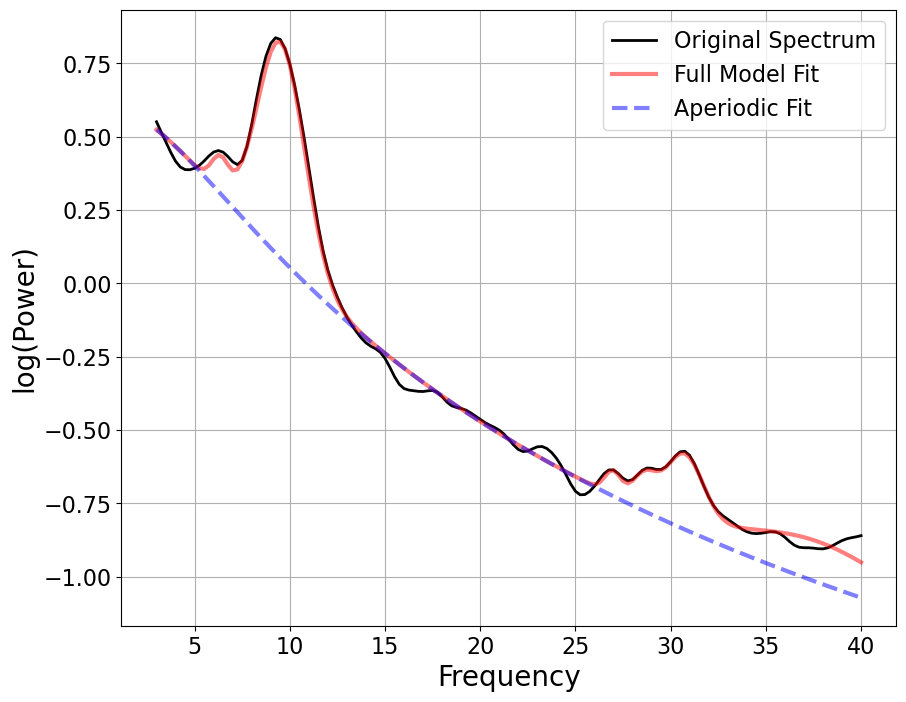

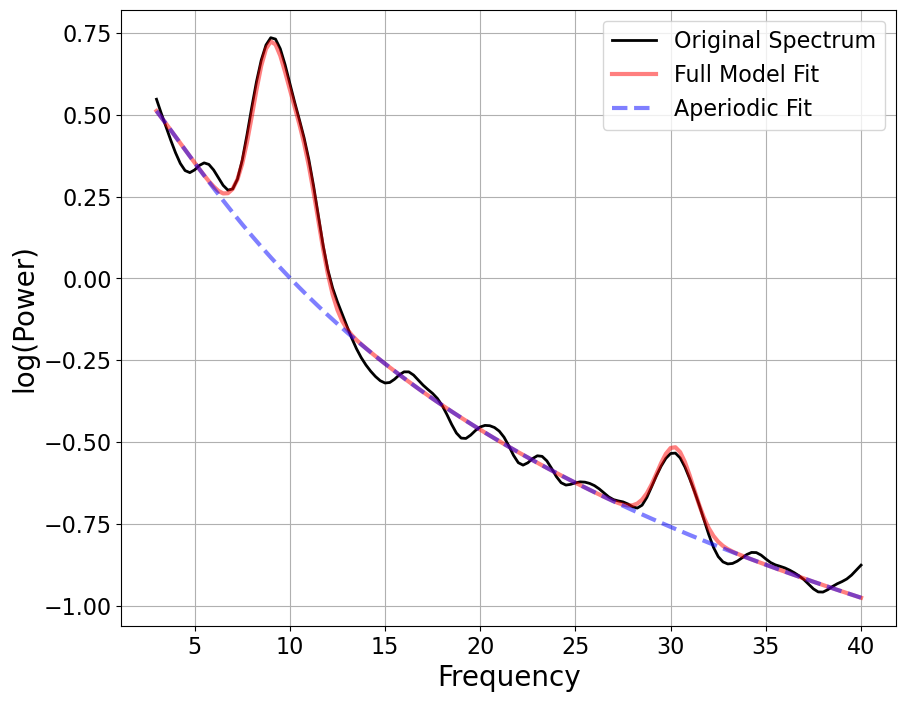

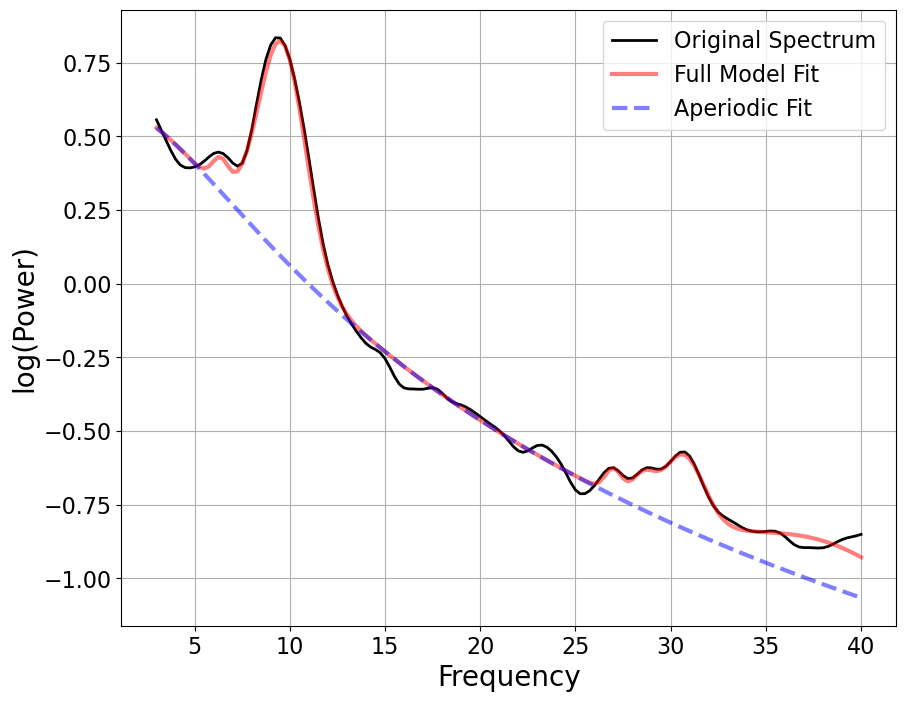

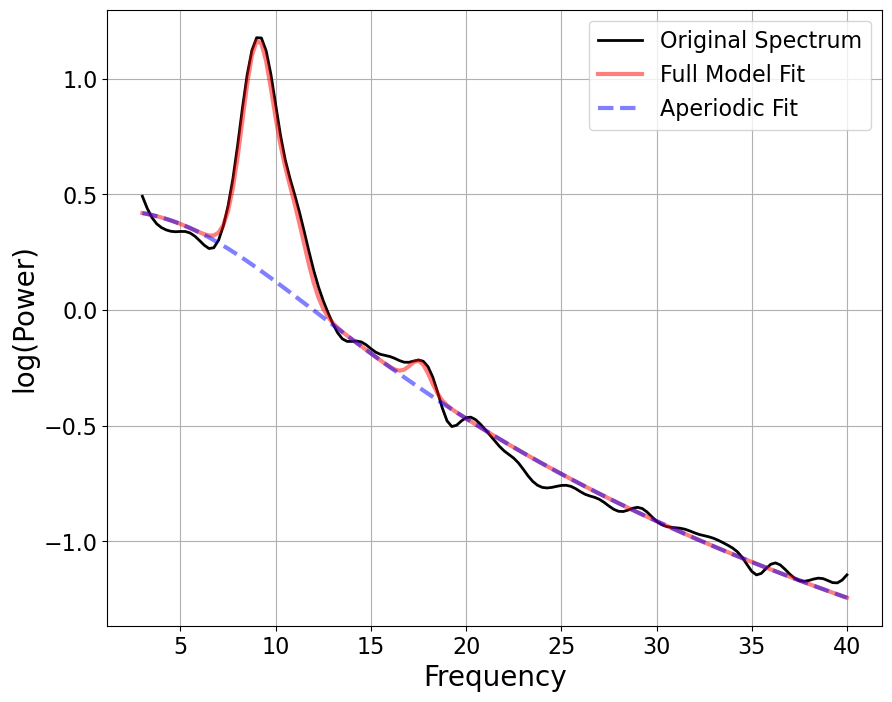

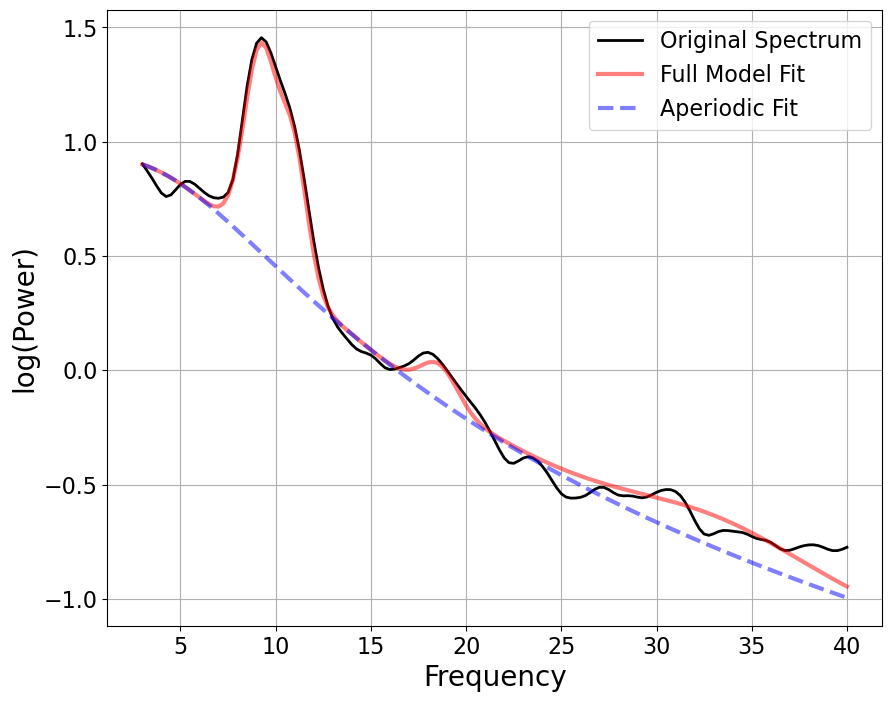

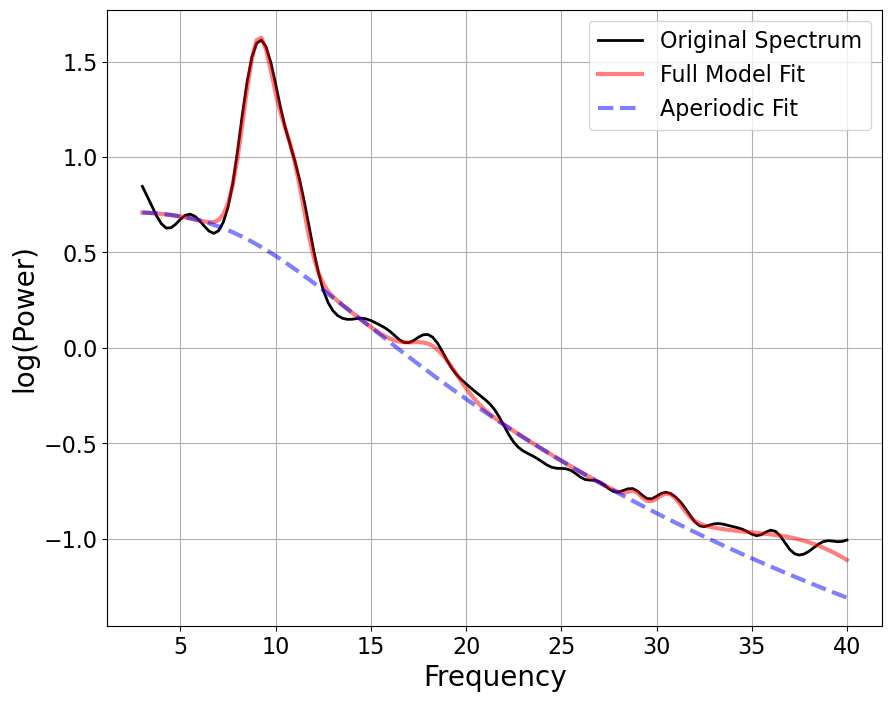

In [8]:
# Specify the subject ID and channel number
subject_id = '' 
channel_no =  

# Iterate over subjects
for subj in range(data_all.shape[0]):
    fm = FOOOF(aperiodic_mode='knee')
    data = data_all['spect'][subj]
    name = data_all['ID'][subj]
    freqs = data_all['freq'][subj]

    if name == subject_id:
        # Fit and report the model for specified channels
        spectrum = data[channel_no]
        fm.fit(freqs, spectrum, freq_range)
        fm.report()


## Reference

Donoghue T, Haller M, Peterson EJ, Varma P, Sebastian P, Gao R, Noto T, Lara AH, Wallis JD, Knight RT, Shestyuk A, Voytek B (2020). Parameterizing neural power spectra into periodic and aperiodic components. Nature Neuroscience, 23, 1655-1665. DOI: 10.1038/s41593-020-00744-x